In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, LabelEncoder


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#from sklearn.preprocessing import Imputer

import missingno as msno

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from tensorflow.keras.layers import BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ELU
from tensorflow.keras import optimizers

# import norm
from tensorflow.keras.constraints import unit_norm


# standardise all plot sizes
plt.rcParams['figure.figsize'] = (15,10)

# set the random state for the whole notebook
np.random.seed(666)

In [2]:
df = pd.read_csv('~/Desktop/tensor-tarragon-student-code/week12_house-prices//data/train.csv')

In [3]:
# test dataframe for kaggle submission
test = pd.read_csv('~/Desktop/tensor-tarragon-student-code/week12_house-prices//data/test.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

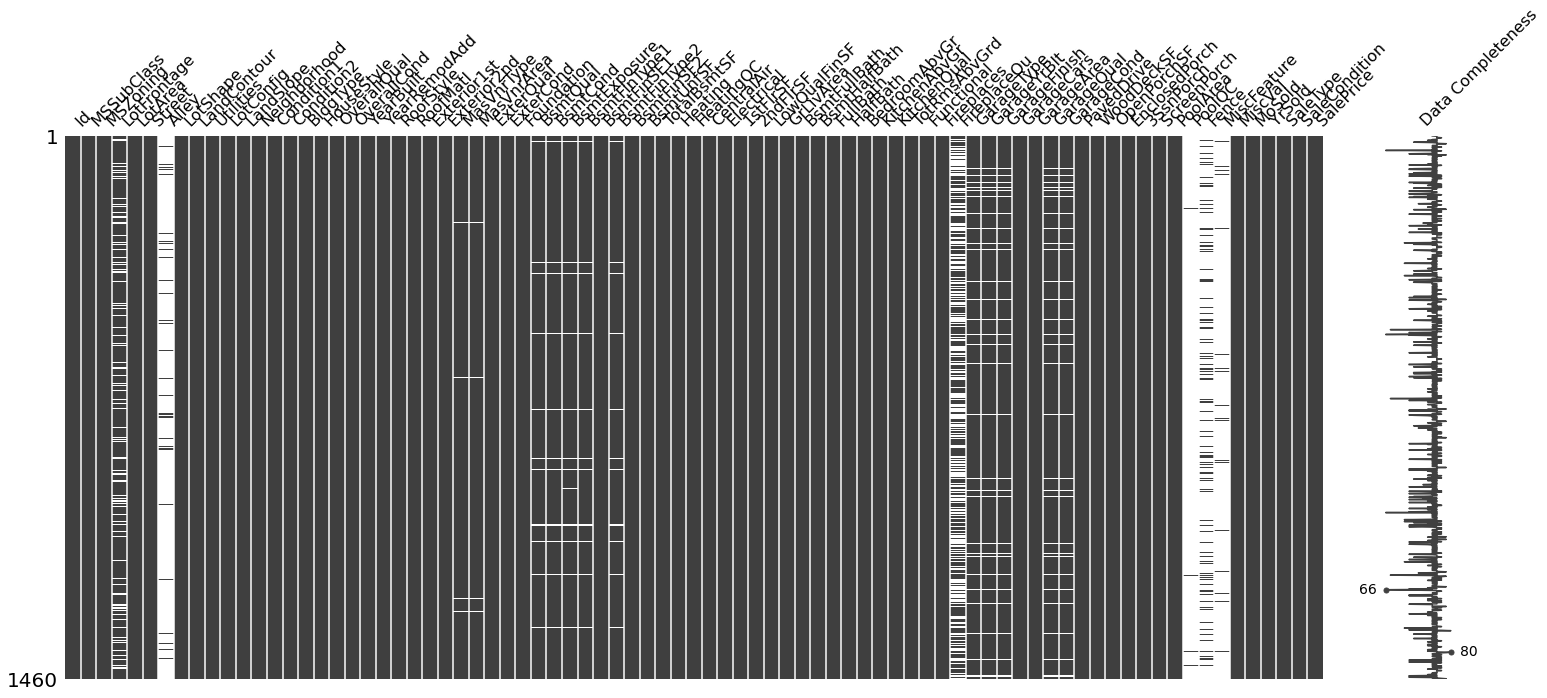

In [7]:
msno.matrix(df, labels=True)

In [8]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test.shape, df.shape

((1459, 80), (1460, 81))

## 1. TRAIN-TEST-SPLIT

In [10]:
X = df.drop(columns=['SalePrice','Alley','PoolQC','Fence','MiscFeature', 'FireplaceQu'])
y = df['SalePrice']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [11]:
test_1 = test.drop(columns=['Alley','PoolQC','Fence','MiscFeature', 'FireplaceQu', 'Id'])

In [12]:
Xtrain.shape, Xtest.shape, test_1.shape, test.shape

((1095, 75), (365, 75), (1459, 74), (1459, 80))

In [13]:
ytrain.shape, ytest.shape

((1095,), (365,))

## 2. FEATURE ENGINEERING

## 2.1 separate categorical and numerical features

In [14]:
# categorical
Xtrain_cat = Xtrain.loc[:, Xtrain.dtypes == np.object]
Xtrain_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
215,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
523,RL,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,...,SBrkr,Ex,Typ,BuiltIn,Fin,TA,TA,Y,New,Partial
1108,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Abnorml
160,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,RL,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
70,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
830,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,FuseA,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Abnorml


In [15]:
# categorical Xtest
Xtest_cat = Xtest.loc[:, Xtest.dtypes == np.object]
Xtest_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
214,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
999,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
545,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
254,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
402,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
68,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
645,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
491,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,...,FuseA,Fa,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [16]:
# categorical test
test_cat = test_1.loc[:, test_1.dtypes == np.object]
test_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [17]:
# numerical
Xtrain_num = Xtrain.drop(Xtrain_cat, axis=1)
Xtrain_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
215,216,20,72.0,10011,5,6,1957,1996,64.0,360,...,447,0,0,0,0,0,0,0,5,2006
523,524,60,130.0,40094,10,5,2007,2008,762.0,2260,...,884,208,406,0,0,0,0,0,10,2007
1108,1109,60,NaN,8063,6,5,2000,2000,0.0,0,...,463,100,48,0,0,0,0,0,11,2007
160,161,20,NaN,11120,6,6,1984,1984,0.0,660,...,516,0,0,0,0,0,0,0,6,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,415,60,59.0,11228,7,5,1993,1993,0.0,50,...,678,196,187,0,0,0,0,0,12,2008
70,71,20,95.0,13651,7,6,1973,1973,1115.0,1880,...,516,300,0,0,0,0,0,0,2,2007
830,831,20,80.0,11900,6,5,1957,1957,387.0,1040,...,458,0,0,0,0,192,0,0,6,2008
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,0,36,56,0,0,0,0,0,7,2006


In [18]:
# Xtest numerical
Xtest_num = Xtest.drop(Xtest_cat, axis=1)
Xtest_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
214,215,60,NaN,10900,6,7,1977,1977,153.0,378,...,299,0,36,0,0,0,0,450,3,2010
999,1000,20,64.0,6762,7,5,2006,2006,24.0,686,...,632,105,61,0,0,0,0,0,2,2010
545,546,50,NaN,13837,7,5,1988,1988,178.0,1002,...,786,0,0,0,0,0,0,0,2,2006
254,255,20,70.0,8400,5,6,1957,1957,0.0,922,...,294,250,0,0,0,0,0,0,6,2010
402,403,30,60.0,10200,5,8,1940,1997,0.0,0,...,240,168,0,0,0,0,0,0,8,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,34,20,70.0,10552,5,5,1959,1959,0.0,1018,...,447,0,38,0,0,0,0,0,4,2010
68,69,30,47.0,4608,4,6,1945,1950,0.0,0,...,220,0,0,0,0,0,0,0,6,2010
645,646,20,NaN,10530,6,5,1971,1971,0.0,282,...,576,0,312,40,0,0,0,0,3,2007
491,492,50,79.0,9490,6,7,1941,1950,0.0,403,...,240,0,0,32,0,0,0,0,8,2006


In [19]:
# test numerical
test_num = test_1.drop(test_cat, axis=1)
test_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


## 2.2 categorical features: 
       *missing values and class imbalance ---> select features
       *impute missing values

In [20]:
Xtrain_cat.shape, Xtest_cat.shape, test_cat.shape

((1095, 38), (365, 38), (1459, 38))

In [21]:
Xtrain_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
test_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:>

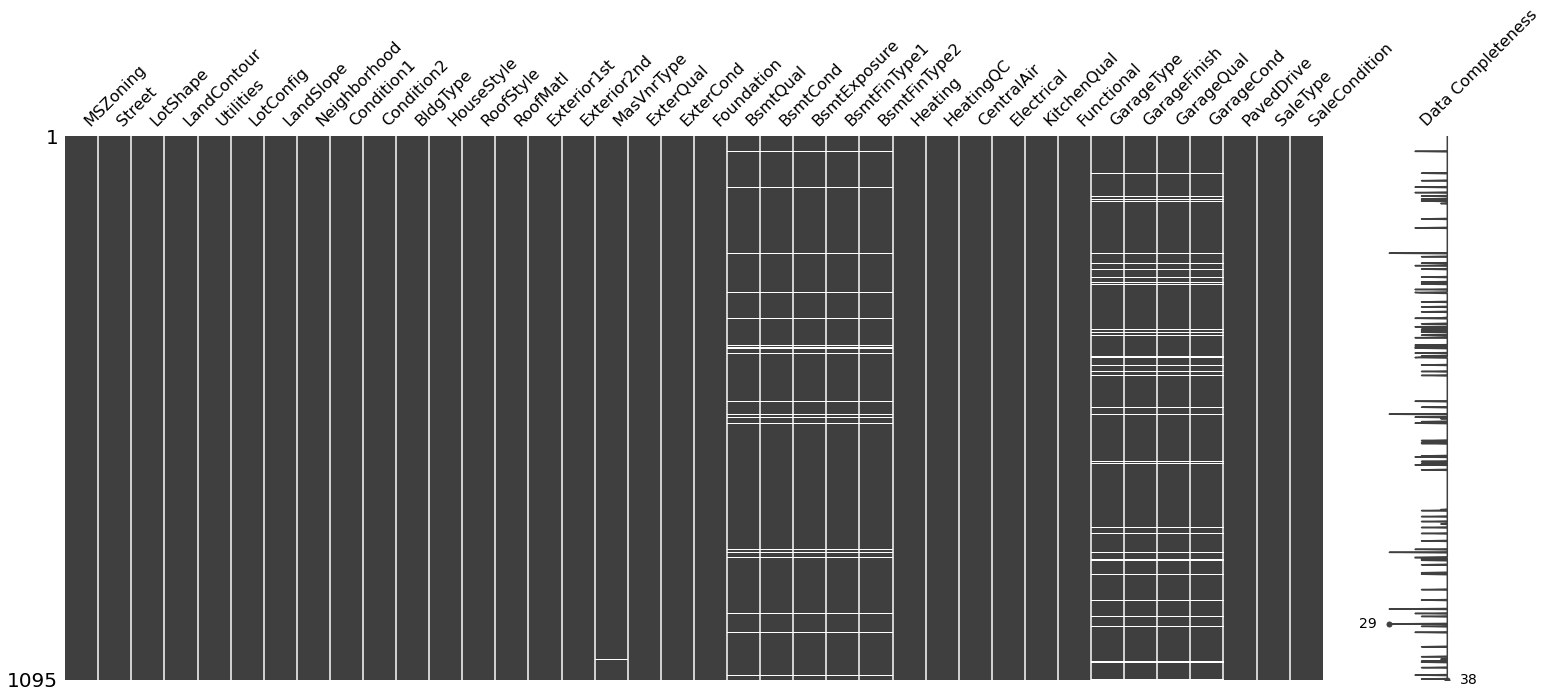

In [23]:
msno.matrix(Xtrain_cat, labels=True)

In [24]:
Xtrain_cat.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        7
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      13
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         4
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         4
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

<AxesSubplot:>

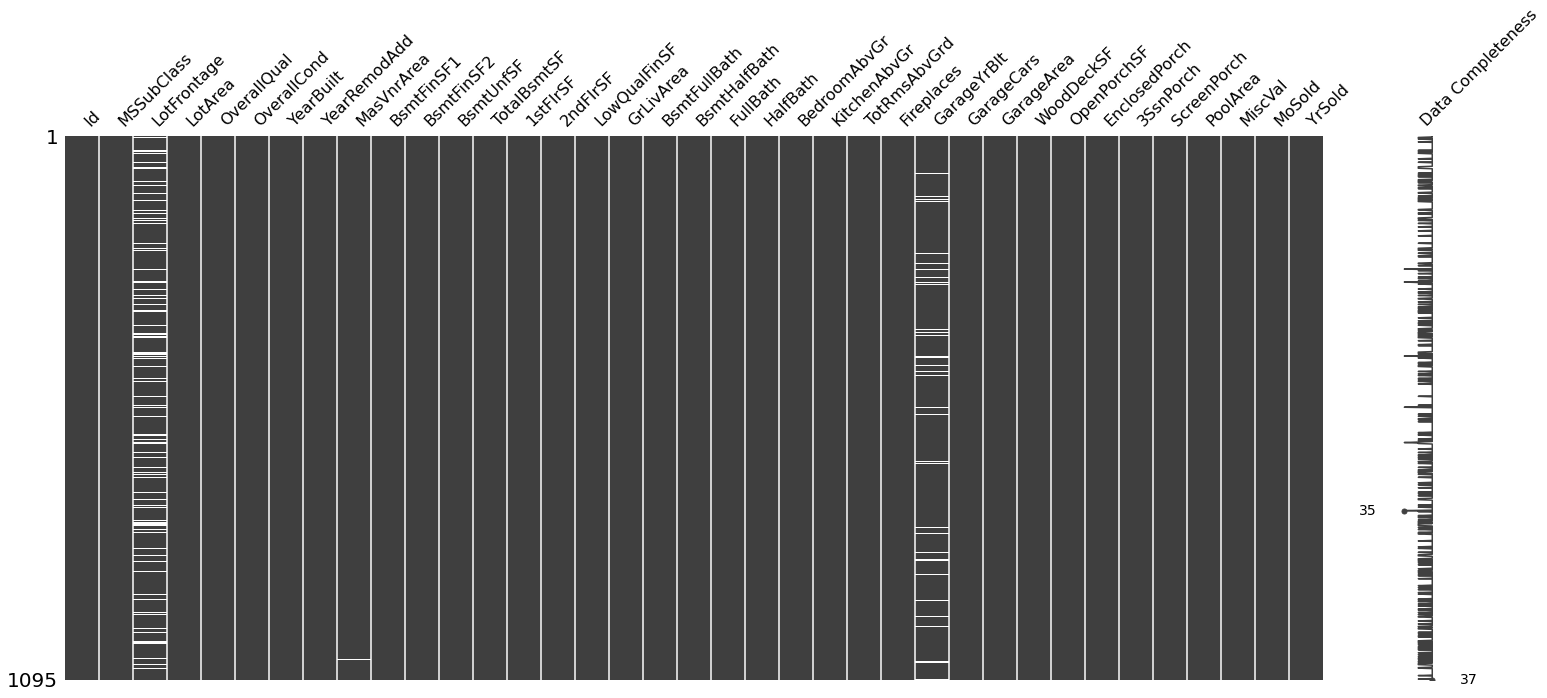

In [25]:
msno.matrix(Xtrain_num, labels=True)

In [26]:
val = list(Xtrain_cat.Street.value_counts()/1095)
for el in val:
    if el > 0.70:
        print('drop')

drop


In [27]:
Xtrain_cat.Street

1456    Pave
215     Pave
523     Pave
1108    Pave
160     Pave
        ... 
414     Pave
70      Pave
830     Pave
1453    Pave
236     Pave
Name: Street, Length: 1095, dtype: object

In [28]:
Xtrain_cat.BsmtCond.value_counts()/1460 > 0.70

TA    False
Gd    False
Fa    False
Po    False
Name: BsmtCond, dtype: bool

In [29]:
feature = list(Xtrain_cat.columns)
feat = list(Xtrain_cat[feature[0]].value_counts()/1095 < 0.70)
#for i in feature:
    #print(Xtrain_cat[i])


In [30]:
# function to check the class imbalance 
def nmbr(df):
    feature = list(df.columns)
    val = []
    for i in feature:
        val.append((i, df[i].value_counts()/1095  > 0.70))
    return val        

In [31]:
perc = nmbr(Xtrain_cat)
perc

[('MSZoning',
  RL          True
  RM         False
  FV         False
  RH         False
  C (all)    False
  Name: MSZoning, dtype: bool),
 ('Street',
  Pave     True
  Grvl    False
  Name: Street, dtype: bool),
 ('LotShape',
  Reg    False
  IR1    False
  IR2    False
  IR3    False
  Name: LotShape, dtype: bool),
 ('LandContour',
  Lvl     True
  Bnk    False
  HLS    False
  Low    False
  Name: LandContour, dtype: bool),
 ('Utilities',
  AllPub     True
  NoSeWa    False
  Name: Utilities, dtype: bool),
 ('LotConfig',
  Inside      True
  Corner     False
  CulDSac    False
  FR2        False
  FR3        False
  Name: LotConfig, dtype: bool),
 ('LandSlope',
  Gtl     True
  Mod    False
  Sev    False
  Name: LandSlope, dtype: bool),
 ('Neighborhood',
  NAmes      False
  CollgCr    False
  OldTown    False
  Edwards    False
  NridgHt    False
  Somerst    False
  Gilbert    False
  Sawyer     False
  NWAmes     False
  SawyerW    False
  Mitchel    False
  Crawfor    False
 

In [32]:
# drop features --> class imbalance
Xtrain_cat.drop(columns = ['MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond',
            'BsmtCond', 'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], inplace=True)

In [33]:
# drop features --> class imbalance
Xtest_cat.drop(columns = ['MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond',
            'BsmtCond', 'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], inplace=True)

In [34]:
# drop features --> class imbalance
test_cat.drop(columns = ['MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond',
            'BsmtCond', 'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], inplace=True)

In [35]:
 # check
Xtrain_cat.shape, Xtest_cat.shape, test_cat.shape

((1095, 15), (365, 15), (1459, 15))

In [36]:
Xtrain_cat.nunique()

LotShape         4
Neighborhood    25
HouseStyle       8
Exterior1st     13
Exterior2nd     15
MasVnrType       4
ExterQual        4
Foundation       6
BsmtQual         4
BsmtExposure     4
BsmtFinType1     6
HeatingQC        4
KitchenQual      4
GarageType       6
GarageFinish     3
dtype: int64

<AxesSubplot:>

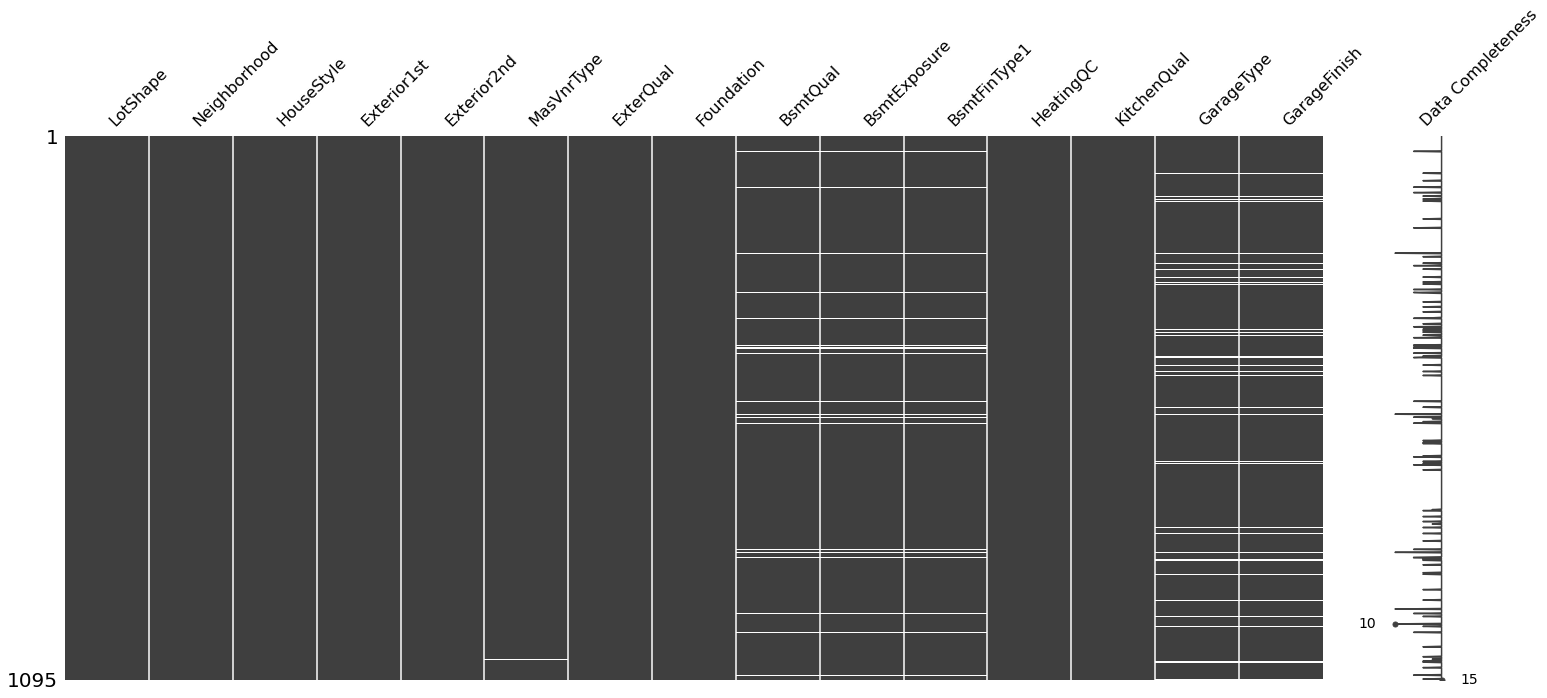

In [37]:
msno.matrix(Xtrain_cat, labels=True)

In [38]:
Xtrain_cat.Neighborhood.value_counts()/1095

NAmes      0.156164
CollgCr    0.094064
OldTown    0.081279
Edwards    0.073059
NridgHt    0.055708
Somerst    0.053881
Gilbert    0.052968
Sawyer     0.052055
NWAmes     0.052055
SawyerW    0.045662
Mitchel    0.035616
Crawfor    0.034703
BrkSide    0.032877
NoRidge    0.027397
Timber     0.025571
IDOTRR     0.025571
ClearCr    0.018265
StoneBr    0.017352
SWISU      0.016438
MeadowV    0.011872
Blmngtn    0.010959
BrDale     0.010959
Veenker    0.008219
NPkVill    0.006393
Blueste    0.000913
Name: Neighborhood, dtype: float64

## *impute missing values

In [39]:
# garage ---> No Garage
Xtrain_cat[['GarageType', 'GarageFinish']] = Xtrain_cat[['GarageType', 'GarageFinish']].fillna('No Garage')

In [40]:
Xtrain_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
1456,Reg,NWAmes,1Story,Plywood,Plywood,Stone,TA,CBlock,Gd,No,ALQ,TA,TA,Attchd,Unf
215,IR1,NAmes,1Story,HdBoard,HdBoard,BrkFace,TA,CBlock,TA,No,BLQ,TA,Gd,Attchd,Unf
523,IR1,Edwards,2Story,CemntBd,CmentBd,Stone,Ex,PConc,Ex,Gd,GLQ,Ex,Ex,BuiltIn,Fin
1108,Reg,Gilbert,2Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,Attchd,RFn
160,IR1,Veenker,1Story,Plywood,Plywood,None,TA,PConc,Gd,No,BLQ,TA,TA,Attchd,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,IR2,SawyerW,2Story,VinylSd,VinylSd,None,Gd,PConc,Gd,No,BLQ,Ex,Gd,Attchd,Unf
70,IR1,NAmes,1Story,Plywood,Plywood,BrkFace,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,Fin
830,IR1,NAmes,1Story,HdBoard,HdBoard,BrkFace,TA,CBlock,TA,No,Rec,TA,TA,Attchd,RFn
1453,Reg,Mitchel,1Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,No Garage,No Garage


In [41]:
# garage ---> No Garage
Xtest_cat[['GarageType', 'GarageFinish']] = Xtest_cat[['GarageType', 'GarageFinish']].fillna('No Garage')

In [42]:
Xtest_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
214,IR1,CollgCr,2Story,HdBoard,HdBoard,BrkFace,TA,CBlock,Gd,No,GLQ,Ex,TA,Attchd,Fin
999,Reg,CollgCr,1Story,VinylSd,VinylSd,Stone,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn
545,IR1,NWAmes,1.5Fin,HdBoard,HdBoard,BrkFace,Gd,PConc,Gd,No,GLQ,Gd,Gd,Attchd,Unf
254,Reg,NAmes,1Story,MetalSd,MetalSd,None,TA,CBlock,TA,No,Rec,TA,TA,Attchd,RFn
402,Reg,Sawyer,1Story,Wd Sdng,Wd Sdng,None,TA,PConc,TA,No,Unf,Ex,TA,Detchd,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,IR1,NAmes,1Story,BrkFace,BrkFace,None,TA,CBlock,TA,No,Rec,Gd,Gd,Attchd,RFn
68,Reg,OldTown,1Story,MetalSd,MetalSd,None,TA,CBlock,TA,No,Unf,TA,TA,Attchd,Unf
645,IR1,NAmes,1Story,Plywood,Plywood,None,TA,CBlock,TA,No,ALQ,TA,TA,Detchd,Unf
491,Reg,NAmes,1.5Fin,Wd Sdng,Wd Sdng,None,TA,CBlock,TA,No,BLQ,TA,Fa,Attchd,Unf


In [43]:
# garage ---> No Garage
test_cat[['GarageType', 'GarageFinish']] = test_cat[['GarageType', 'GarageFinish']].fillna('No Garage')

In [44]:
test_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,Reg,NAmes,1Story,VinylSd,VinylSd,None,TA,CBlock,TA,No,Rec,TA,TA,Attchd,Unf
1,IR1,NAmes,1Story,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,TA,No,ALQ,TA,Gd,Attchd,Unf
2,IR1,Gilbert,2Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,GLQ,Gd,TA,Attchd,Fin
3,IR1,Gilbert,2Story,VinylSd,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,Ex,Gd,Attchd,Fin
4,IR1,StoneBr,1Story,HdBoard,HdBoard,None,Gd,PConc,Gd,No,ALQ,Ex,Gd,Attchd,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Reg,MeadowV,2Story,CemntBd,CmentBd,None,TA,CBlock,TA,No,Unf,Gd,TA,No Garage,No Garage
1455,Reg,MeadowV,2Story,CemntBd,CmentBd,None,TA,CBlock,TA,No,Rec,TA,TA,CarPort,Unf
1456,Reg,Mitchel,1Story,VinylSd,VinylSd,None,TA,CBlock,TA,No,ALQ,Ex,TA,Detchd,Unf
1457,Reg,Mitchel,SFoyer,HdBoard,Wd Shng,None,TA,PConc,Gd,Av,GLQ,TA,TA,No Garage,No Garage


In [45]:
# Basement ---> No Basement
Xtrain_cat[['BsmtQual','BsmtExposure','BsmtFinType1']] = Xtrain_cat[['BsmtQual','BsmtExposure','BsmtFinType1']].fillna('No Basement')

In [46]:
Xtrain_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
1456,Reg,NWAmes,1Story,Plywood,Plywood,Stone,TA,CBlock,Gd,No,ALQ,TA,TA,Attchd,Unf
215,IR1,NAmes,1Story,HdBoard,HdBoard,BrkFace,TA,CBlock,TA,No,BLQ,TA,Gd,Attchd,Unf
523,IR1,Edwards,2Story,CemntBd,CmentBd,Stone,Ex,PConc,Ex,Gd,GLQ,Ex,Ex,BuiltIn,Fin
1108,Reg,Gilbert,2Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,Attchd,RFn
160,IR1,Veenker,1Story,Plywood,Plywood,None,TA,PConc,Gd,No,BLQ,TA,TA,Attchd,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,IR2,SawyerW,2Story,VinylSd,VinylSd,None,Gd,PConc,Gd,No,BLQ,Ex,Gd,Attchd,Unf
70,IR1,NAmes,1Story,Plywood,Plywood,BrkFace,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,Fin
830,IR1,NAmes,1Story,HdBoard,HdBoard,BrkFace,TA,CBlock,TA,No,Rec,TA,TA,Attchd,RFn
1453,Reg,Mitchel,1Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,No Garage,No Garage


In [47]:
# Basement ---> No Basement
Xtest_cat[['BsmtQual','BsmtExposure','BsmtFinType1']] = Xtest_cat[['BsmtQual','BsmtExposure','BsmtFinType1']].fillna('No Basement')

In [48]:
Xtest_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
214,IR1,CollgCr,2Story,HdBoard,HdBoard,BrkFace,TA,CBlock,Gd,No,GLQ,Ex,TA,Attchd,Fin
999,Reg,CollgCr,1Story,VinylSd,VinylSd,Stone,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn
545,IR1,NWAmes,1.5Fin,HdBoard,HdBoard,BrkFace,Gd,PConc,Gd,No,GLQ,Gd,Gd,Attchd,Unf
254,Reg,NAmes,1Story,MetalSd,MetalSd,None,TA,CBlock,TA,No,Rec,TA,TA,Attchd,RFn
402,Reg,Sawyer,1Story,Wd Sdng,Wd Sdng,None,TA,PConc,TA,No,Unf,Ex,TA,Detchd,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,IR1,NAmes,1Story,BrkFace,BrkFace,None,TA,CBlock,TA,No,Rec,Gd,Gd,Attchd,RFn
68,Reg,OldTown,1Story,MetalSd,MetalSd,None,TA,CBlock,TA,No,Unf,TA,TA,Attchd,Unf
645,IR1,NAmes,1Story,Plywood,Plywood,None,TA,CBlock,TA,No,ALQ,TA,TA,Detchd,Unf
491,Reg,NAmes,1.5Fin,Wd Sdng,Wd Sdng,None,TA,CBlock,TA,No,BLQ,TA,Fa,Attchd,Unf


In [49]:
# Basement ---> No Basement
test_cat[['BsmtQual','BsmtExposure','BsmtFinType1']] = test_cat[['BsmtQual','BsmtExposure','BsmtFinType1']].fillna('No Basement')

In [50]:
test_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,Reg,NAmes,1Story,VinylSd,VinylSd,None,TA,CBlock,TA,No,Rec,TA,TA,Attchd,Unf
1,IR1,NAmes,1Story,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,TA,No,ALQ,TA,Gd,Attchd,Unf
2,IR1,Gilbert,2Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,GLQ,Gd,TA,Attchd,Fin
3,IR1,Gilbert,2Story,VinylSd,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,Ex,Gd,Attchd,Fin
4,IR1,StoneBr,1Story,HdBoard,HdBoard,None,Gd,PConc,Gd,No,ALQ,Ex,Gd,Attchd,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Reg,MeadowV,2Story,CemntBd,CmentBd,None,TA,CBlock,TA,No,Unf,Gd,TA,No Garage,No Garage
1455,Reg,MeadowV,2Story,CemntBd,CmentBd,None,TA,CBlock,TA,No,Rec,TA,TA,CarPort,Unf
1456,Reg,Mitchel,1Story,VinylSd,VinylSd,None,TA,CBlock,TA,No,ALQ,Ex,TA,Detchd,Unf
1457,Reg,Mitchel,SFoyer,HdBoard,Wd Shng,None,TA,PConc,Gd,Av,GLQ,TA,TA,No Garage,No Garage


In [51]:
# MasVnrType ---> None
Xtrain_cat.MasVnrType = Xtrain_cat.MasVnrType.fillna('None')

<AxesSubplot:>

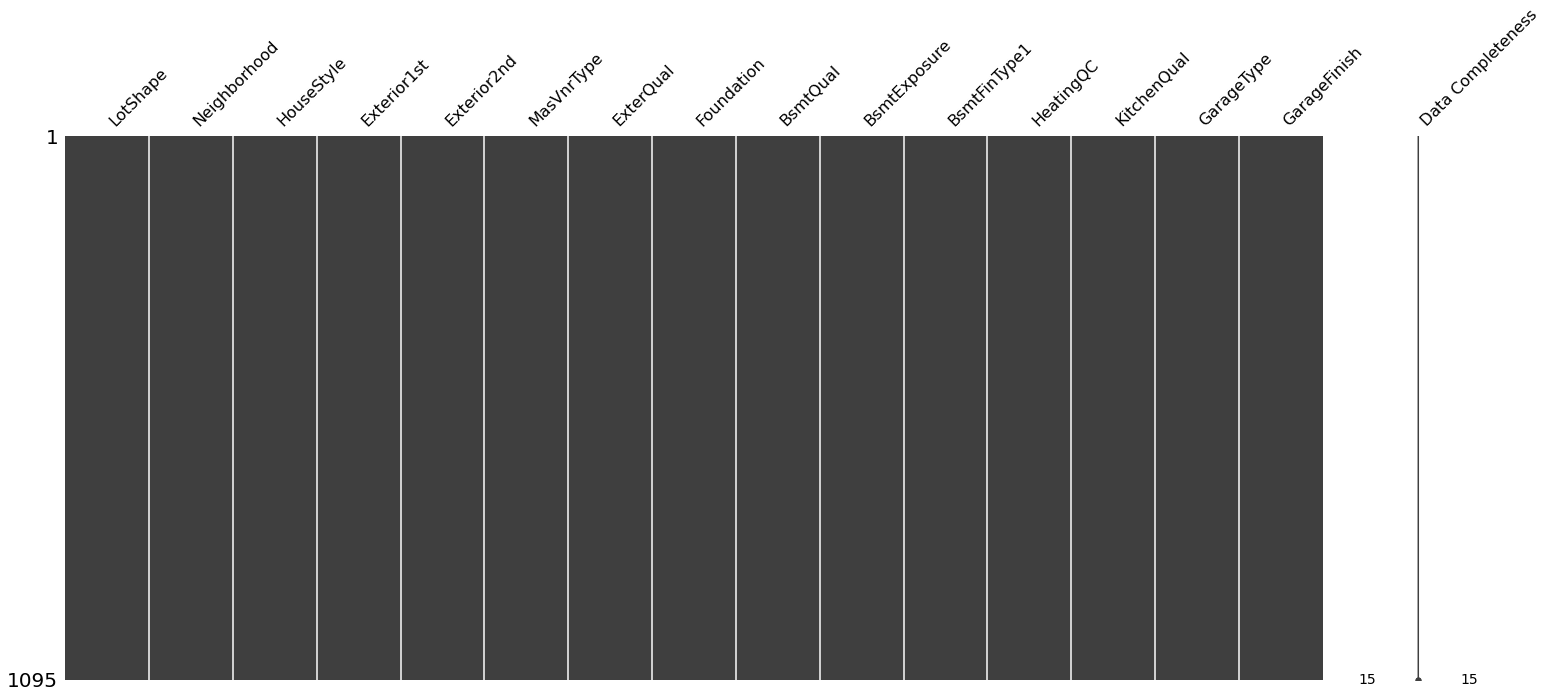

In [52]:
msno.matrix(Xtrain_cat, labels=True)

In [53]:
# MasVnrType ---> None
Xtest_cat.MasVnrType = Xtest_cat.MasVnrType.fillna('None')

<AxesSubplot:>

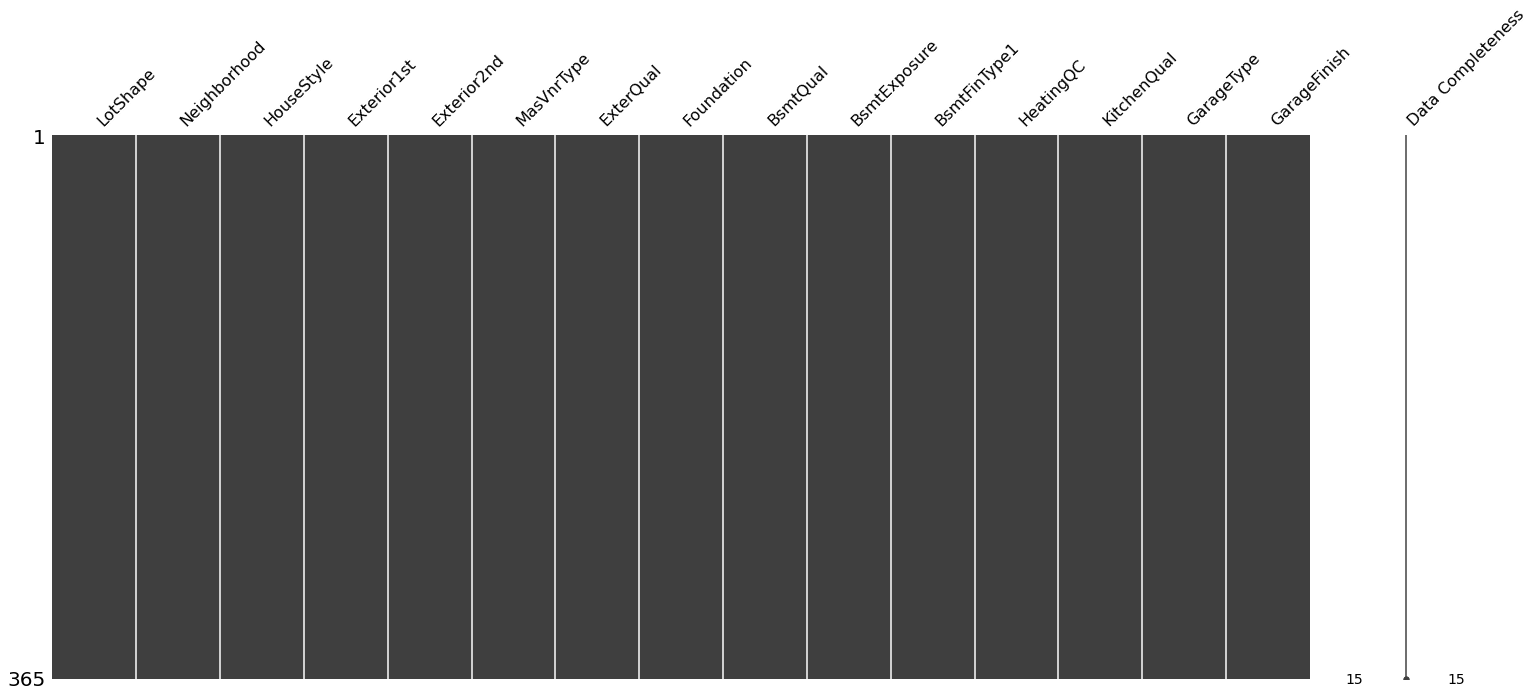

In [54]:
msno.matrix(Xtest_cat, labels=True)

In [55]:
# MasVnrType ---> None
test_cat.MasVnrType = test_cat.MasVnrType.fillna('None')

In [56]:
Xtrain_cat_result = Xtrain_cat.drop(columns=['LotShape','Neighborhood','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','BsmtQual','BsmtExposure','BsmtFinType1','GarageType','GarageFinish'])

In [57]:
Xtest_cat_result = Xtest_cat.drop(columns=['LotShape','Neighborhood','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','BsmtQual','BsmtExposure','BsmtFinType1','GarageType','GarageFinish'])

In [58]:
test_cat_result = test_cat.drop(columns=['LotShape','Neighborhood','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','BsmtQual','BsmtExposure','BsmtFinType1','GarageType','GarageFinish'])

<AxesSubplot:>

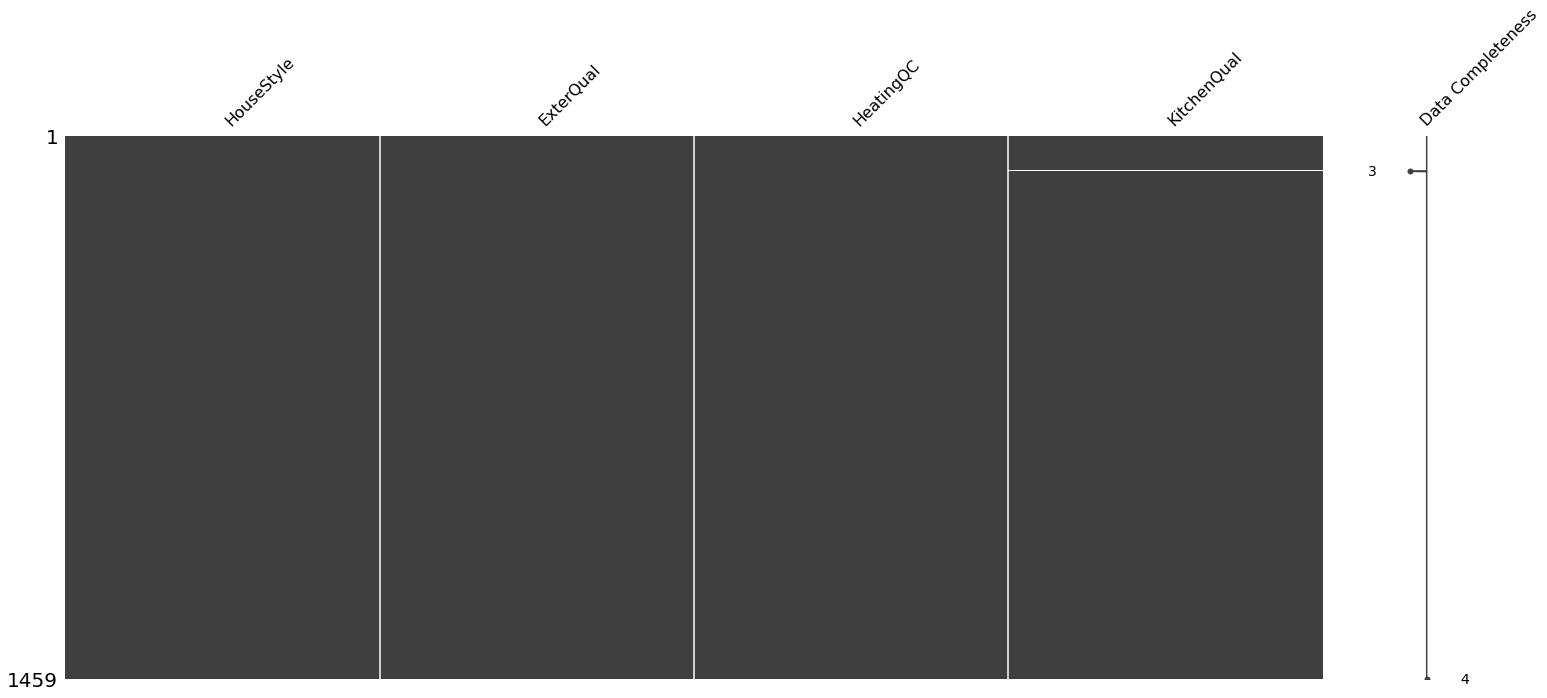

In [59]:
msno.matrix(test_cat_result, labels=True)

In [60]:
# impute the missing KitchenQual
imp = SimpleImputer(strategy= 'most_frequent')

In [61]:
test_cat_result = pd.DataFrame(imp.fit_transform(test_cat_result))

In [62]:
Xtrain_cat_result.columns

Index(['HouseStyle', 'ExterQual', 'HeatingQC', 'KitchenQual'], dtype='object')

In [63]:
Xtest_cat_result.columns

Index(['HouseStyle', 'ExterQual', 'HeatingQC', 'KitchenQual'], dtype='object')

In [64]:
test_cat_result.columns = Xtest_cat_result.columns
test_cat_result.columns

Index(['HouseStyle', 'ExterQual', 'HeatingQC', 'KitchenQual'], dtype='object')

In [65]:
Xtrain_cat_result.shape, Xtest_cat_result.shape, test_cat_result.shape

((1095, 4), (365, 4), (1459, 4))

## 2.3 study the numerical features ---> missing values, redundancy, correlation

In [66]:
Xtrain_num.shape, Xtest_num.shape, test_num.shape

((1095, 37), (365, 37), (1459, 36))

<AxesSubplot:>

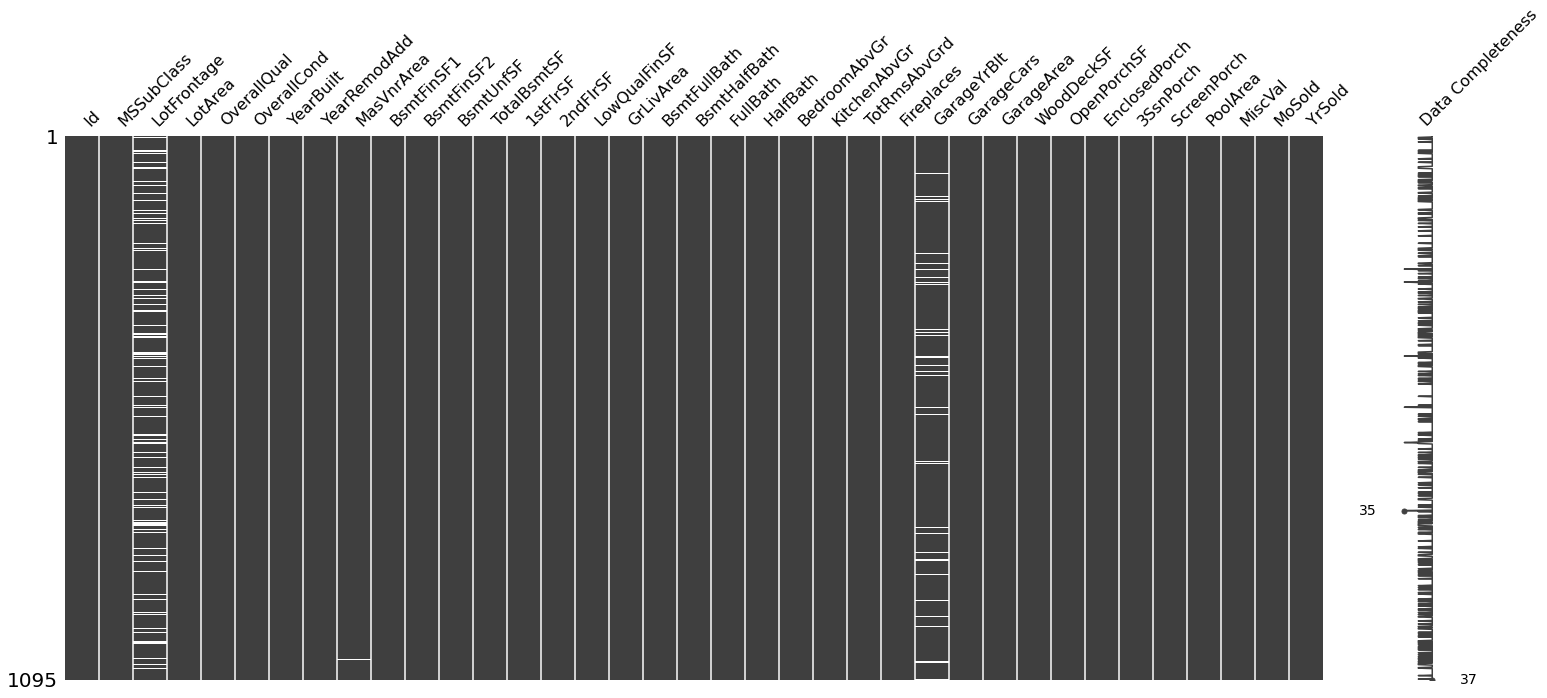

In [67]:
msno.matrix(Xtrain_num, labels=True)

In [243]:
test_num.isna().sum()

MSSubClass          0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
Total_Area          1
Total_Porch_Area    0
Half_Baths          2
Full_Baths          2
dtype: int64

In [68]:
Xtrain_num.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      193
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         4
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       62
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

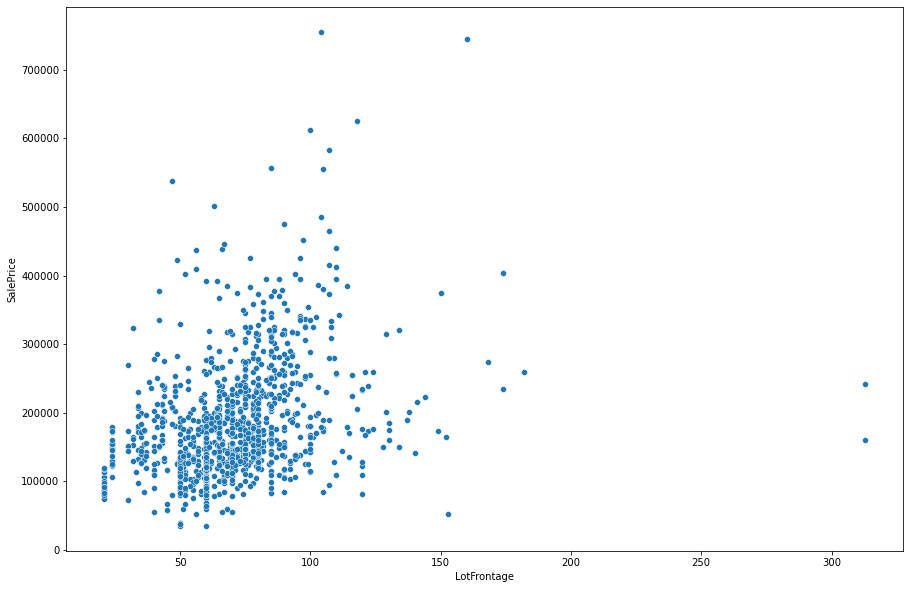

In [69]:
sns.scatterplot(x=df.LotFrontage, y=df.SalePrice)

In [70]:
Xtrain_num.LotFrontage

1456     85.0
215      72.0
523     130.0
1108      NaN
160       NaN
        ...  
414      59.0
70       95.0
830      80.0
1453     90.0
236      65.0
Name: LotFrontage, Length: 1095, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

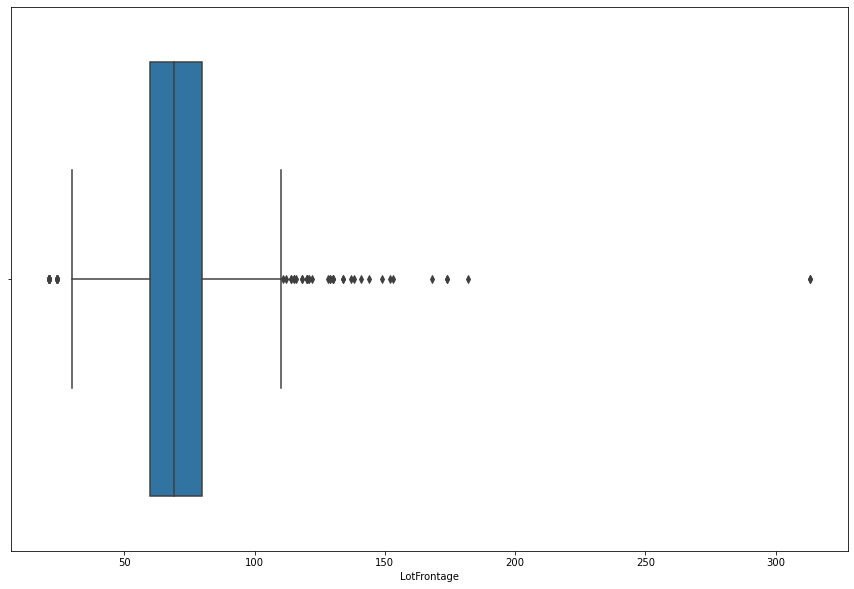

In [71]:
sns.boxplot(x = Xtrain_num['LotFrontage'], hue=  ytrain)

In [72]:
Xtrain_num.LotFrontage.value_counts()/1095

60.0     0.104110
80.0     0.046575
70.0     0.044749
50.0     0.035616
65.0     0.034703
           ...   
144.0    0.000913
168.0    0.000913
46.0     0.000913
39.0     0.000913
153.0    0.000913
Name: LotFrontage, Length: 106, dtype: float64

In [73]:
193/1095

0.17625570776255708

### *'LotFrontage' could be dropped missing values represent 17.63% of the data, the highest value in that feature (60.0 ---> 10.41%)

In [74]:
Xtrain_num.drop(columns = ['LotFrontage'], inplace=True)

In [75]:
Xtest_num.drop(columns = ['LotFrontage'], inplace=True)

In [76]:
test_num.drop(columns = ['LotFrontage'], inplace=True)

In [77]:
Xtrain_num.shape, Xtest_num.shape, test_num.shape

((1095, 36), (365, 36), (1459, 35))

In [78]:
## inspect the other: GarageYrBlt
Xtrain_num.GarageYrBlt.value_counts()/1095

2005.0    0.044749
2004.0    0.037443
2006.0    0.035616
2003.0    0.034703
2007.0    0.033790
            ...   
1927.0    0.000913
1914.0    0.000913
1931.0    0.000913
2010.0    0.000913
1933.0    0.000913
Name: GarageYrBlt, Length: 96, dtype: float64

In [79]:
Xtrain_num.GarageYrBlt.isna().sum()/1095

0.05662100456621005

In [80]:
### *GarageYrBlt could be dropped
Xtrain_num.drop(columns=['GarageYrBlt'], inplace=True)

In [81]:
### *GarageYrBlt could be dropped
Xtest_num.drop(columns=['GarageYrBlt'], inplace=True)

In [82]:
### *GarageYrBlt could be dropped
test_num.drop(columns=['GarageYrBlt'], inplace=True)

In [83]:
Xtrain_num.shape, Xtest_num.shape, test_num.shape

((1095, 35), (365, 35), (1459, 34))

<AxesSubplot:>

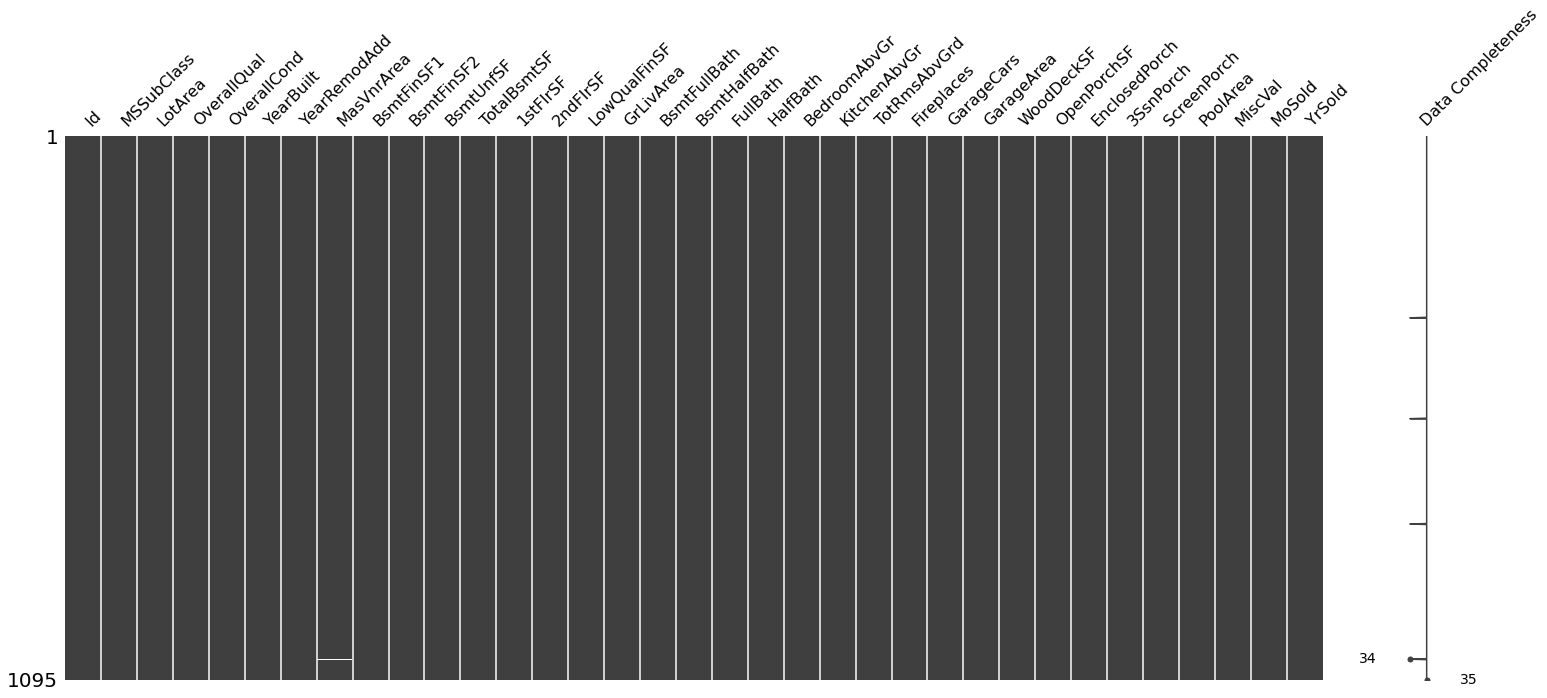

In [84]:
msno.matrix(Xtrain_num, labels=True)

In [85]:
Xtrain_num['MasVnrArea'].mean()

102.5948670944088

In [86]:
# fill missing in MasVnrArea with 0
Xtrain_num.MasVnrArea = Xtrain_num.MasVnrArea.fillna(0)

In [87]:
# fill missing in MasVnrArea with 0
Xtest_num.MasVnrArea = Xtest_num.MasVnrArea.fillna(0)

In [88]:
# fill missing in MasVnrArea with 0
test_num.MasVnrArea = test_num.MasVnrArea.fillna(0)

<AxesSubplot:>

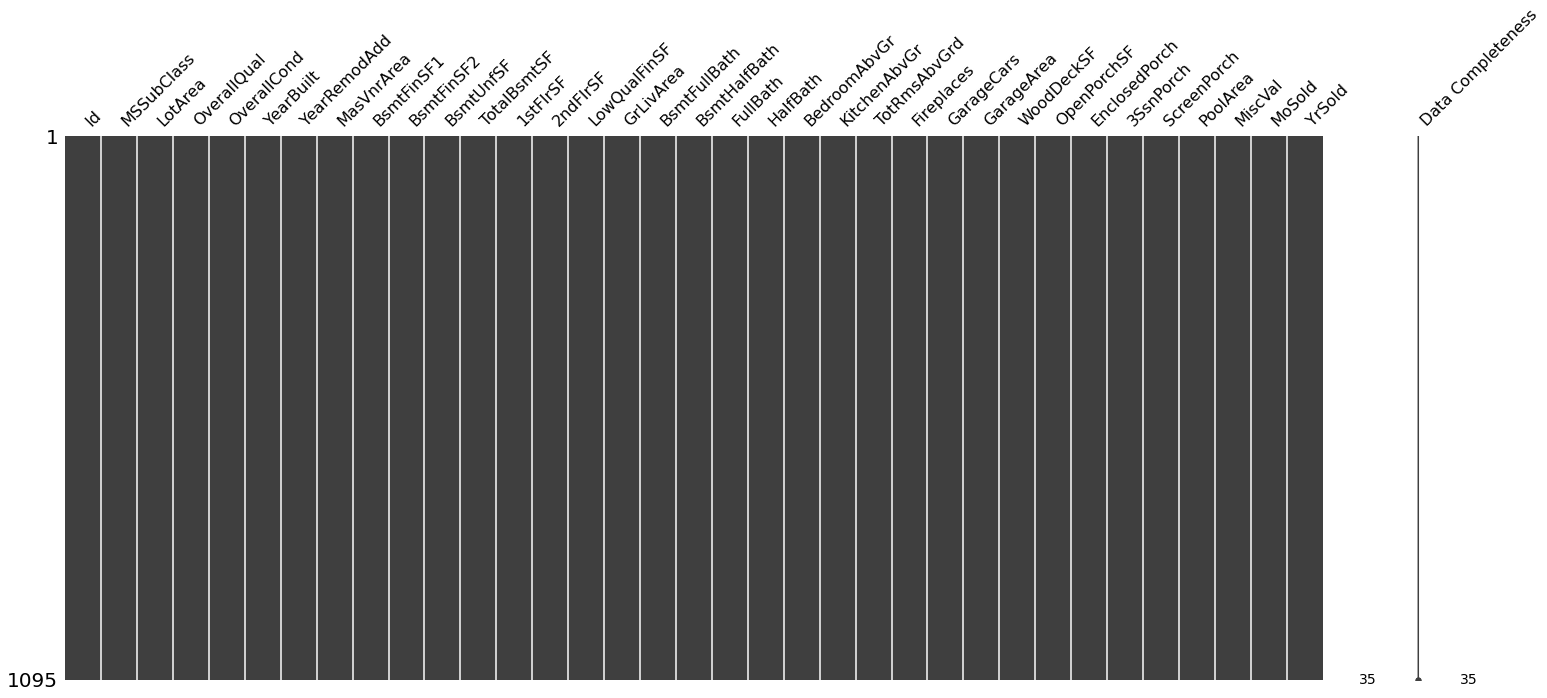

In [89]:
# check visually
msno.matrix(Xtrain_num, labels=True)

In [90]:
Xtrain_num.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

<AxesSubplot:>

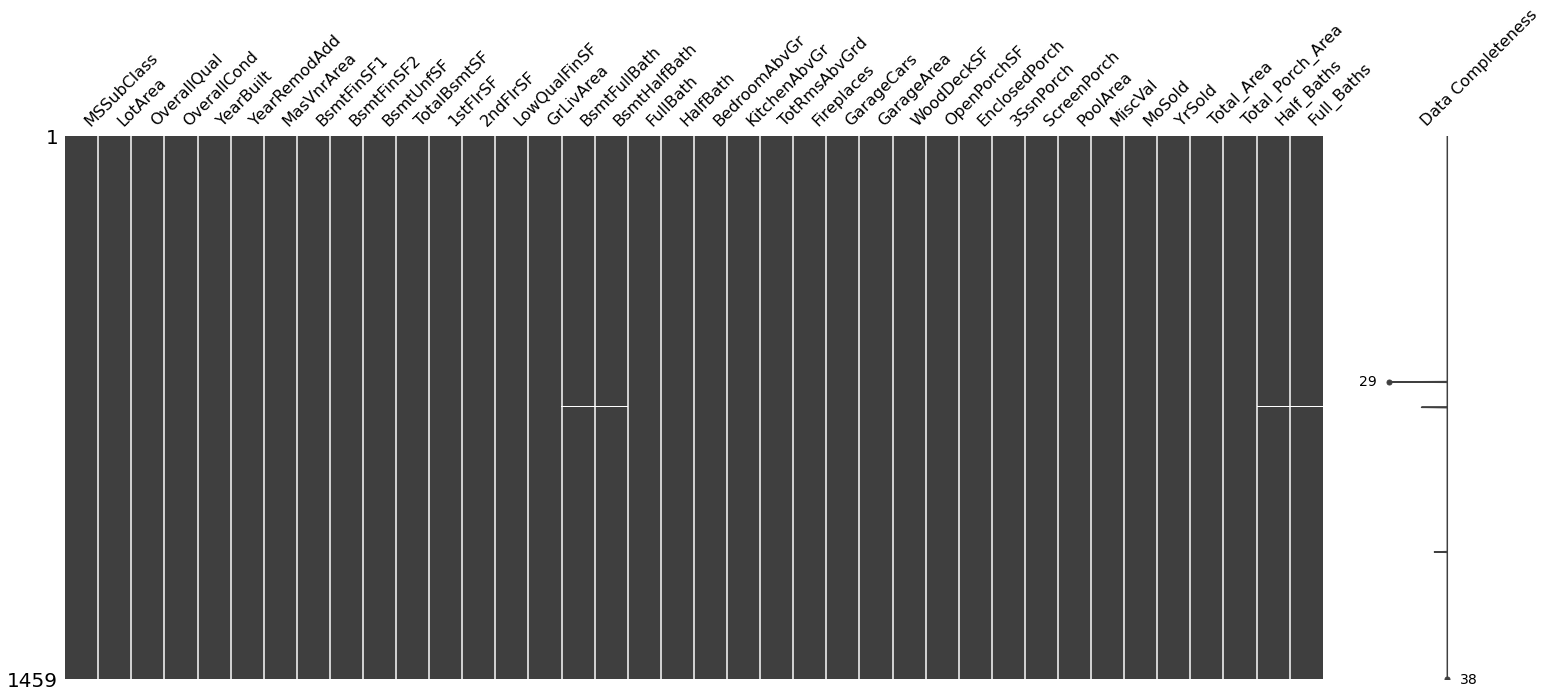

In [244]:
msno.matrix(test_num, labels=True)

In [245]:
test_num.isna().sum()

MSSubClass          0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
Total_Area          1
Total_Porch_Area    0
Half_Baths          2
Full_Baths          2
dtype: int64

In [246]:
# fill missing in GarageArea with 0
test_num.GarageArea = test_num.GarageArea.fillna(0)

In [247]:
# fill missing in BsmtFullBath with 0
test_num.BsmtFullBath = test_num.BsmtFullBath.fillna(0)

In [248]:
# fill missing in BsmtHalfBath with 0
test_num.BsmtHalfBath = test_num.BsmtHalfBath.fillna(0)

In [249]:
# fill missing in TotalBsmtSF with 0
test_num.TotalBsmtSF = test_num.TotalBsmtSF.fillna(0)

In [91]:
Xtrain_num.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [92]:
Xtest_num.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [93]:
test_num.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [94]:
Xtrain_num.shape, Xtest_num.shape, test_num.shape

((1095, 35), (365, 35), (1459, 34))

### *check correlation

In [95]:
num_corr_check = pd.concat([Xtrain_num, ytrain], axis=1)

In [96]:
num_corr_check.shape, Xtrain_num.shape

((1095, 36), (1095, 35))

<AxesSubplot:>

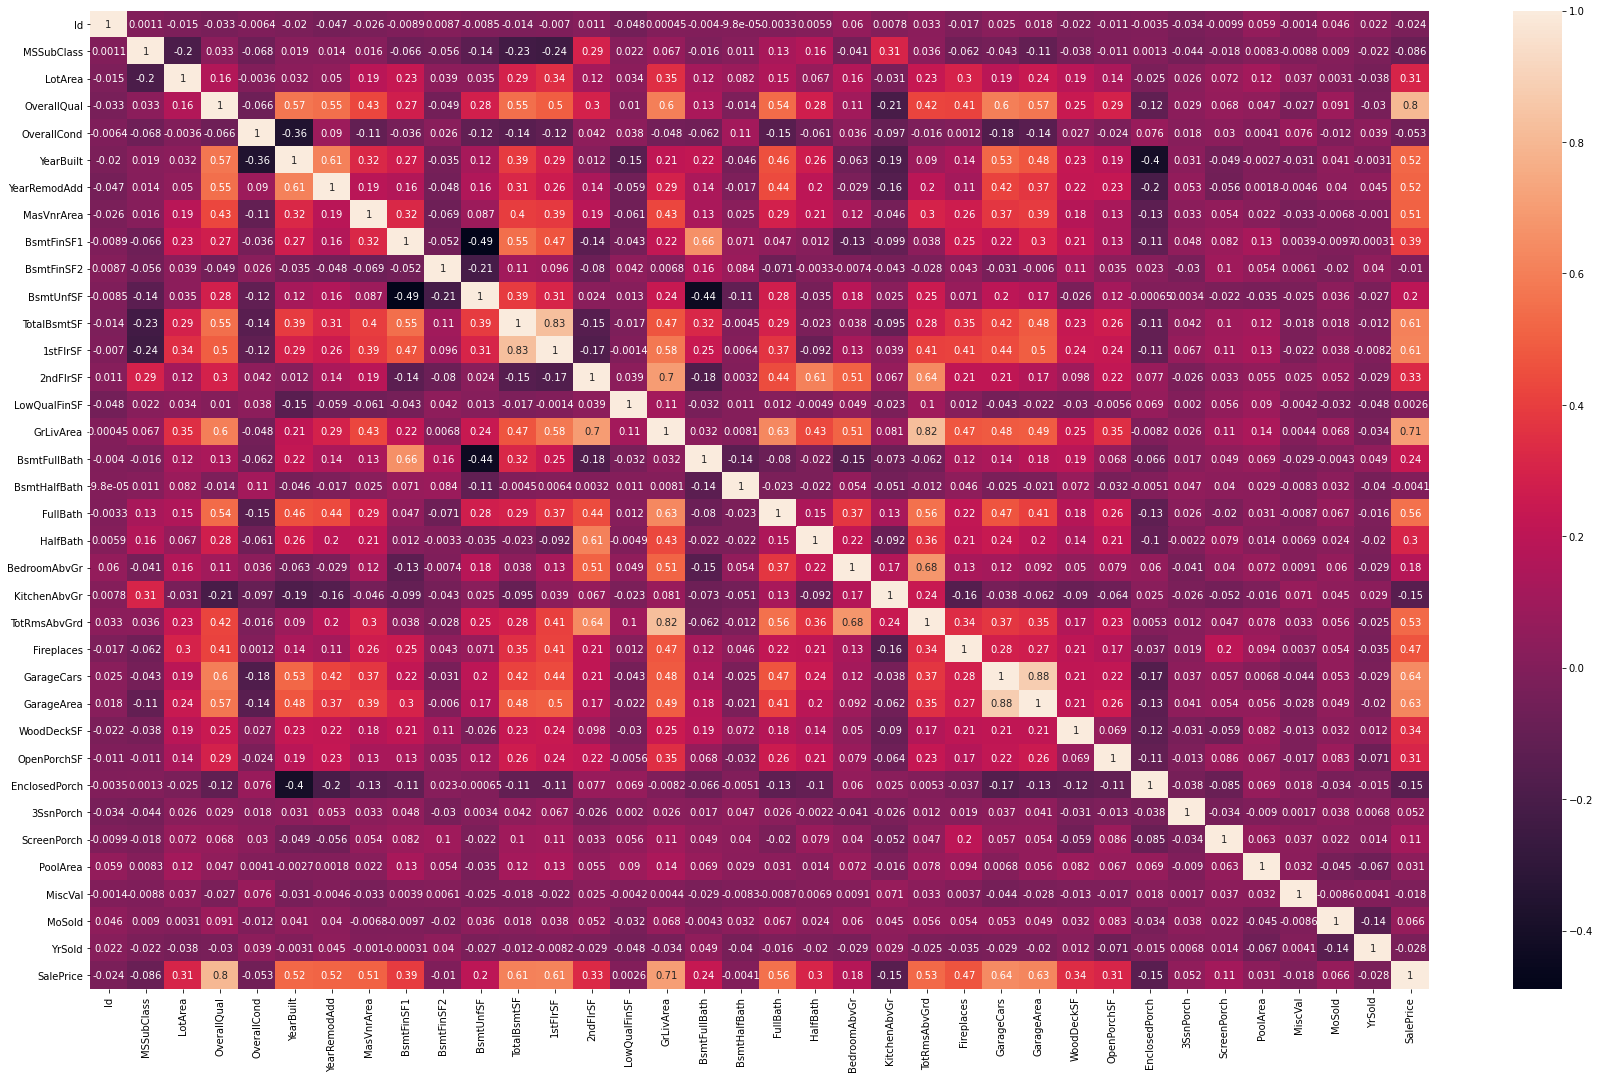

In [97]:
plt.figure(figsize=(30,18))
sns.heatmap(num_corr_check.astype(float).corr(), annot=True)

### *feature_importance

In [98]:
ytrain.shape

(1095,)

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain_num, ytrain)

RandomForestRegressor()

In [100]:
rf.feature_importances_  # the higher the values the more important

array([4.84738273e-03, 2.90616376e-03, 1.42029965e-02, 5.68034908e-01,
       6.18720610e-03, 2.00763058e-02, 1.14710588e-02, 1.14009204e-02,
       2.81328234e-02, 9.66458536e-04, 6.14072783e-03, 5.03716820e-02,
       3.13923119e-02, 2.10760617e-02, 1.08182472e-04, 1.36257074e-01,
       9.07223858e-04, 1.21464597e-03, 2.87911306e-03, 1.29684561e-03,
       2.70675147e-03, 1.90590038e-03, 1.03590361e-02, 3.33420200e-03,
       1.35182608e-02, 2.09102886e-02, 7.78149730e-03, 7.87151662e-03,
       1.20196026e-03, 2.49601350e-04, 1.16493079e-03, 8.56862481e-04,
       1.52531316e-04, 5.47435780e-03, 2.64221030e-03])

### *RecursiveFeatureElimination

In [101]:
rfe = RFE(rf)
rfe.fit(Xtrain_num, ytrain)

RFE(estimator=RandomForestRegressor())

In [102]:
rfe.support_ 

array([False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True, False])

In [103]:
rfe.ranking_   # 1 is most important

array([ 2,  5,  1,  1,  3,  1,  1,  1,  1, 13,  1,  1,  1,  1, 19,  1,  9,
       15,  7, 14,  8, 10,  1,  4,  1,  1,  1,  1, 12, 17, 11, 16, 18,  1,
        6])

In [104]:
Xtrain_num.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [105]:
# combination ground_living_area and total_basement_area
Xtrain_num['Total_Area'] = Xtrain_num.GrLivArea + Xtrain_num.TotalBsmtSF

In [106]:
# combination ground_living_area and total_basement_area
Xtest_num['Total_Area'] = Xtest_num.GrLivArea + Xtest_num.TotalBsmtSF

In [250]:
# combination ground_living_area and total_basement_area
test_num['Total_Area'] = test_num.GrLivArea + test_num.TotalBsmtSF

In [108]:
# combination of all porch area 
Xtrain_num['Total_Porch_Area'] = Xtrain_num.WoodDeckSF + Xtrain_num.OpenPorchSF + Xtrain_num.EnclosedPorch + Xtrain_num['3SsnPorch'] + Xtrain_num.ScreenPorch 

In [109]:
# combination of all porch area 
Xtest_num['Total_Porch_Area'] = Xtest_num.WoodDeckSF + Xtest_num.OpenPorchSF + Xtest_num.EnclosedPorch + Xtest_num['3SsnPorch'] + Xtest_num.ScreenPorch 

In [110]:
# combination of all porch area 
test_num['Total_Porch_Area'] = test_num.WoodDeckSF + test_num.OpenPorchSF + test_num.EnclosedPorch + test_num['3SsnPorch'] + test_num.ScreenPorch 

In [111]:
# combination of all half baths
Xtrain_num['Half_Baths'] = Xtrain_num.BsmtHalfBath + Xtrain_num.HalfBath

In [112]:
# combination of all half baths
Xtest_num['Half_Baths'] = Xtest_num.BsmtHalfBath + Xtest_num.HalfBath

In [251]:
# combination of all half baths
test_num['Half_Baths'] = test_num.BsmtHalfBath + test_num.HalfBath

In [114]:
# combination of all full baths
Xtrain_num['Full_Baths'] = Xtrain_num.BsmtFullBath + Xtrain_num.FullBath

In [115]:
# combination of all full baths
Xtest_num['Full_Baths'] = Xtest_num.BsmtFullBath + Xtest_num.FullBath

In [252]:
# combination of all full baths
test_num['Full_Baths'] = test_num.BsmtFullBath + test_num.FullBath

In [117]:
Xtrain_num.shape, Xtest_num.shape, test_num.shape

((1095, 39), (365, 39), (1459, 38))

In [118]:
Xtrain_num.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Total_Area', 'Total_Porch_Area', 'Half_Baths',
       'Full_Baths'],
      dtype='object')

### *check correlation

In [119]:
num_corr_check = pd.concat([Xtrain_num, ytrain], axis=1)

In [120]:
num_corr_check.shape, Xtrain_num.shape

((1095, 40), (1095, 39))

<AxesSubplot:>

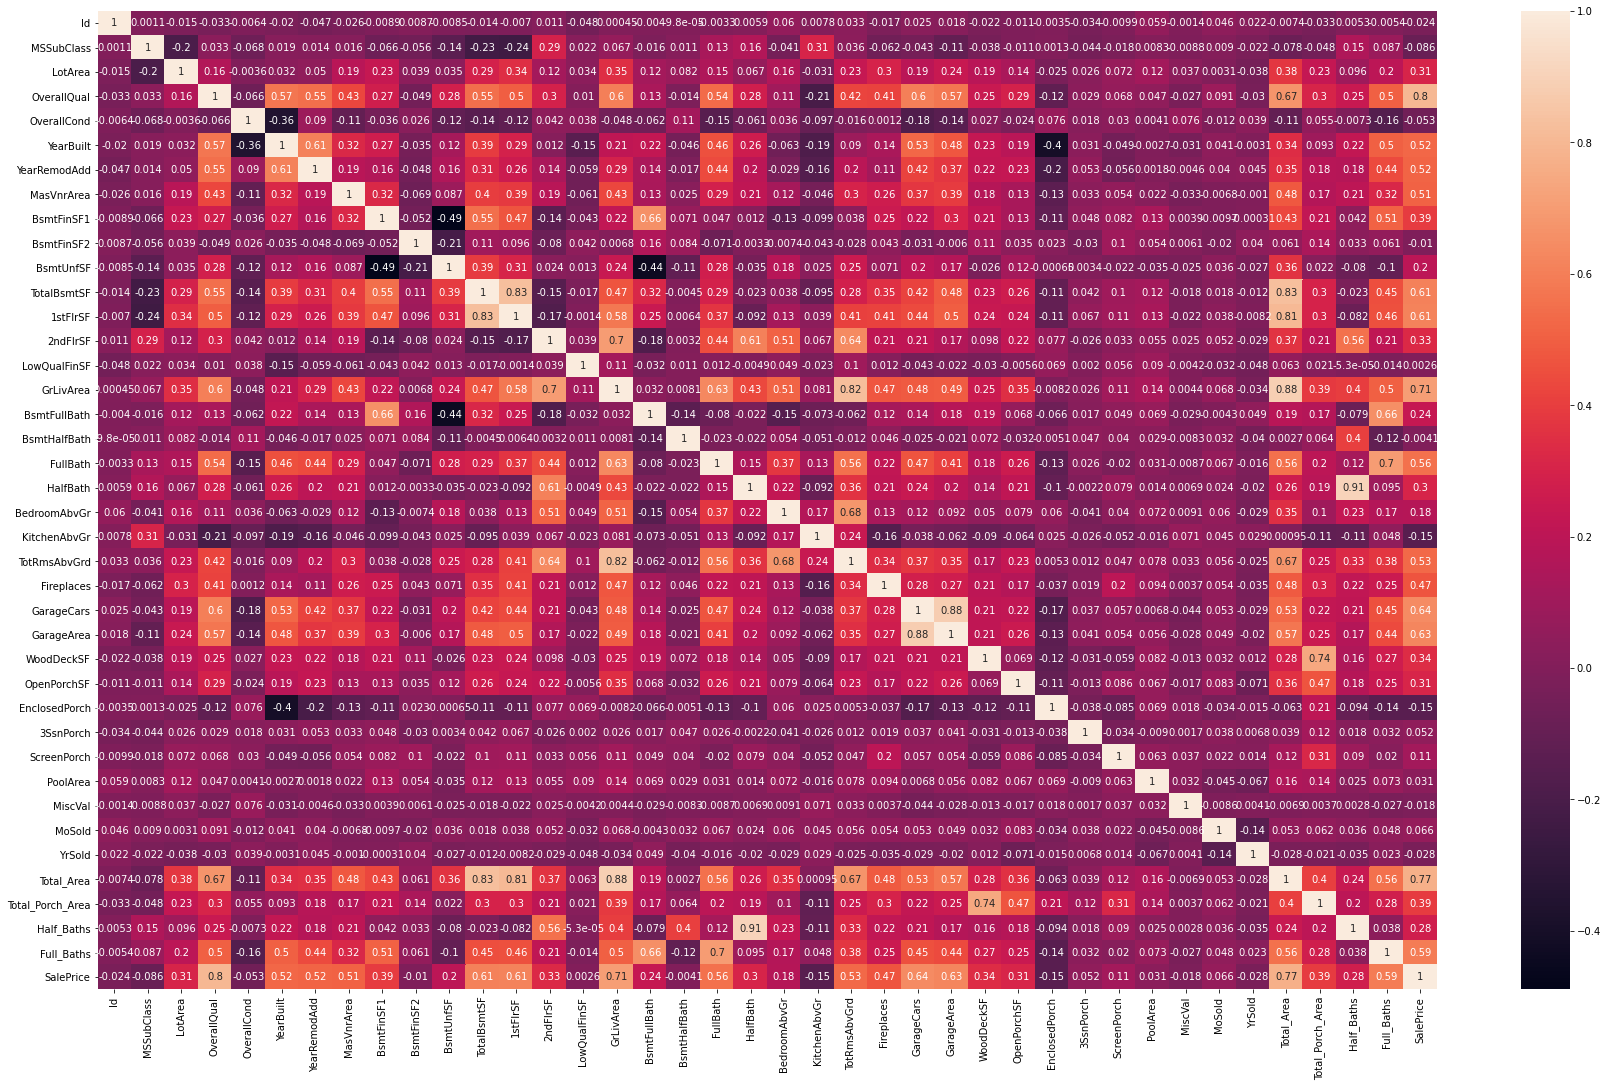

In [121]:
plt.figure(figsize=(30,18))
sns.heatmap(num_corr_check.astype(float).corr(), annot=True)

### *feature_importance

In [122]:
ytrain.shape

(1095,)

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain_num, ytrain)

RandomForestRegressor()

In [124]:
rf.feature_importances_  # the higher the values the more important

array([4.89117563e-03, 2.48133338e-03, 1.12992572e-02, 3.57125122e-01,
       6.85401888e-03, 3.38289737e-02, 1.42423517e-02, 1.19352517e-02,
       1.25283398e-02, 7.14909676e-04, 7.59951896e-03, 5.42480791e-03,
       7.23872811e-03, 2.14302795e-02, 5.83258126e-05, 1.45742659e-02,
       7.04504153e-04, 1.16545337e-03, 9.65919740e-04, 4.91781257e-04,
       1.55632570e-03, 1.28819591e-03, 2.22717773e-03, 3.12454423e-03,
       6.54033945e-03, 1.13581806e-02, 3.96340220e-03, 5.84475600e-03,
       8.71062167e-04, 6.62842460e-04, 8.32970073e-04, 9.18927283e-04,
       1.07891591e-04, 3.85800068e-03, 2.26631997e-03, 4.26475525e-01,
       8.21098452e-03, 1.21435311e-03, 3.12388320e-03])

### *RecursiveFeatureElimination

In [125]:
rfe = RFE(rf)
rfe.fit(Xtrain_num, ytrain)

RFE(estimator=RandomForestRegressor())

In [126]:
rfe.support_ 

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False])

In [127]:
rfe.ranking_   # 1 is most important

array([ 1,  6,  1,  1,  1,  1,  1,  1,  1, 14,  1,  1,  1,  1, 20,  1, 16,
       17,  9, 12,  8, 11,  4,  3,  1,  1,  2,  1, 13, 19, 10, 15, 21,  1,
        7,  1,  1, 18,  5])

In [128]:
Xtrain_num.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Total_Area', 'Total_Porch_Area', 'Half_Baths',
       'Full_Baths'],
      dtype='object')

In [129]:
# feature selection
Xtrain_num_result = Xtrain_num.drop(columns = ['TotalBsmtSF','GrLivArea',
                                              'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                               'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

In [130]:
# feature selection
Xtest_num_result = Xtest_num.drop(columns = ['TotalBsmtSF','GrLivArea',
                                              'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                               'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

In [253]:
# feature selection
test_num_result = test_num.drop(columns = ['TotalBsmtSF','GrLivArea',
                                              'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                               'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

In [132]:
Xtrain_num_result.shape, Xtest_num_result.shape, test_num_result.shape

((1095, 28), (365, 28), (1459, 27))

### *check correlation

In [133]:
num_corr_check = pd.concat([Xtrain_num_result, ytrain], axis=1)

In [134]:
num_corr_check.shape, Xtrain_num_result.shape

((1095, 29), (1095, 28))

<AxesSubplot:>

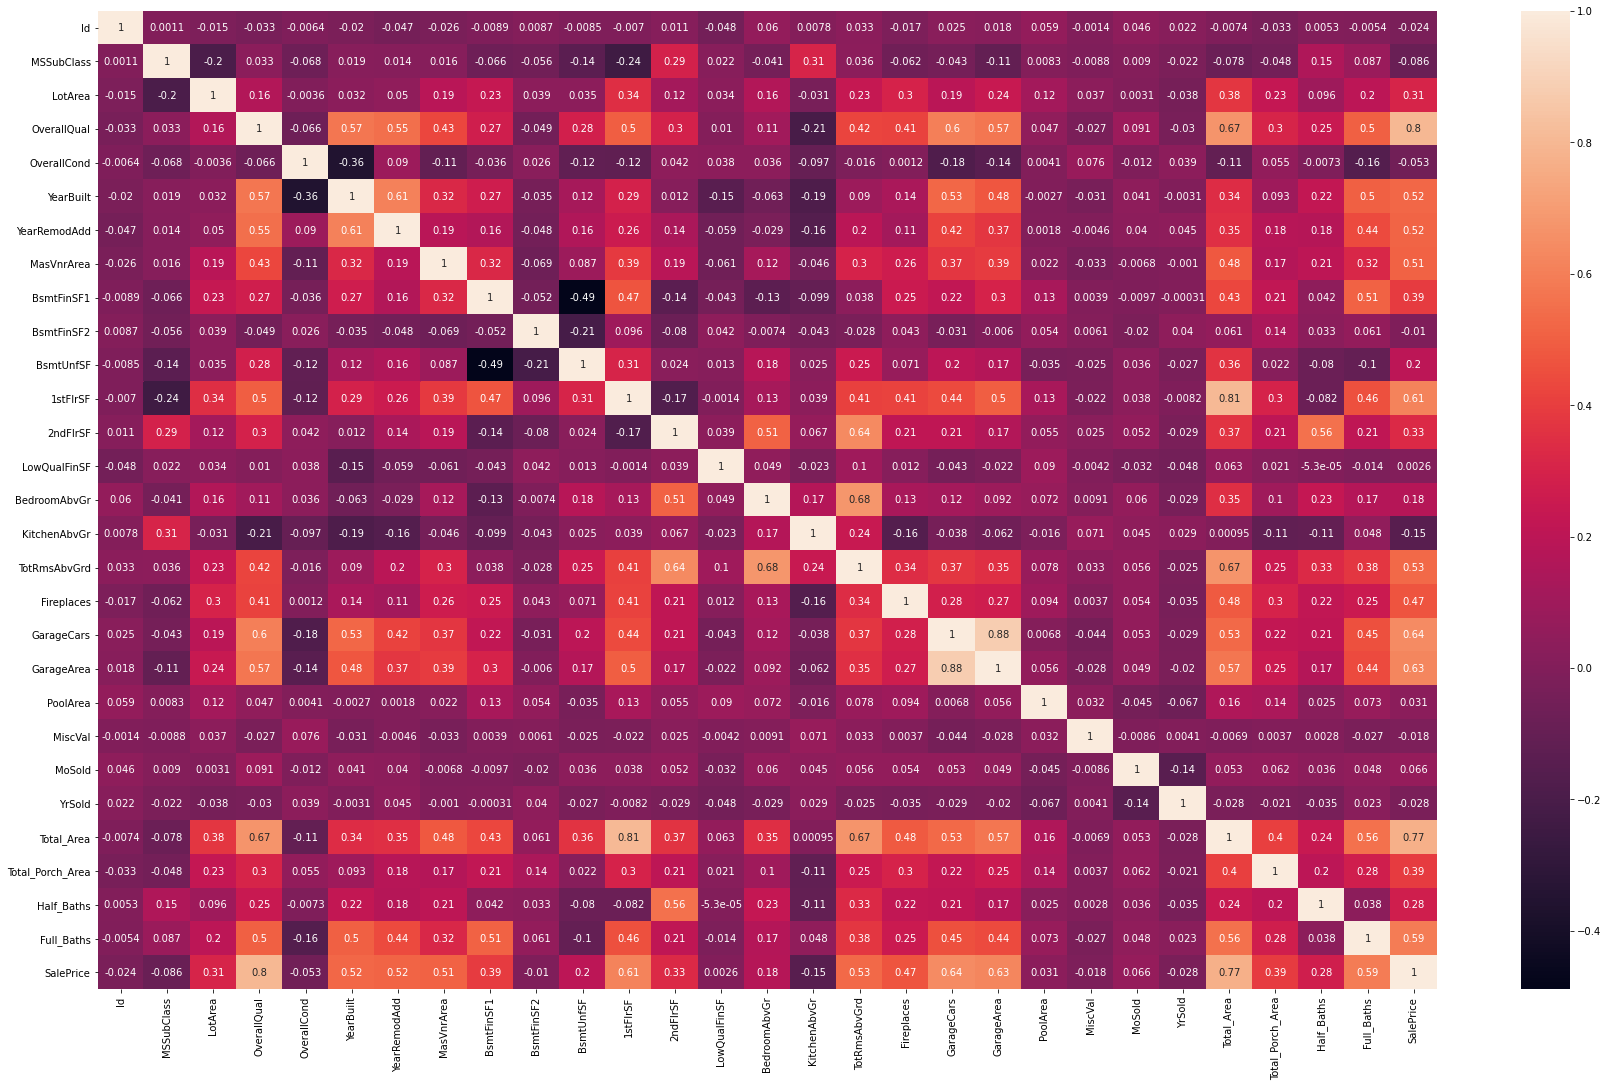

In [135]:
plt.figure(figsize=(30,18))
sns.heatmap(num_corr_check.astype(float).corr(), annot=True)

### *feature_importance

In [136]:
ytrain.shape

(1095,)

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain_num_result, ytrain)

RandomForestRegressor()

In [138]:
rf.feature_importances_  # the higher the values the more important

array([6.26300925e-03, 2.25954743e-03, 1.26069502e-02, 3.64504212e-01,
       8.02464612e-03, 3.19083328e-02, 1.59059335e-02, 9.68073862e-03,
       1.72965020e-02, 1.01272754e-03, 8.45200056e-03, 1.21811825e-02,
       2.59744705e-02, 1.06136264e-04, 1.77415574e-03, 1.84752210e-03,
       3.14866318e-03, 4.42728468e-03, 7.30493949e-03, 1.26256337e-02,
       8.89171202e-04, 9.12390677e-05, 4.97477641e-03, 2.11129255e-03,
       4.29347187e-01, 9.30413416e-03, 2.02294486e-03, 3.95466693e-03])

### *RecursiveFeatureElimination

In [139]:
rfe = RFE(rf)
rfe.fit(Xtrain_num_result, ytrain)

RFE(estimator=RandomForestRegressor())

In [140]:
rfe.support_ 

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False])

In [141]:
rfe.ranking_   # 1 is most important

array([ 2,  5,  1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1, 14, 12,  9,  7,
        6,  1,  1, 13, 15,  3,  8,  1,  1, 10,  4])

In [142]:
Xtrain_num_result.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Total_Area',
       'Total_Porch_Area', 'Half_Baths', 'Full_Baths'],
      dtype='object')

In [143]:
# features selection
Xtrain_num_dr = Xtrain_num_result.drop(columns = ['MSSubClass', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','KitchenAbvGr','GarageCars', 'PoolArea',
       'MiscVal',])

In [144]:
# features selection
Xtest_num_dr = Xtest_num_result.drop(columns = ['MSSubClass', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','KitchenAbvGr','GarageCars', 'PoolArea',
       'MiscVal',])

In [254]:
# features selection
test_num_dr = test_num_result.drop(columns = ['MSSubClass', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','KitchenAbvGr','GarageCars', 'PoolArea',
       'MiscVal',])

In [146]:
Xtrain_num_dr.shape, Xtest_num_dr.shape, test_num_dr.shape

((1095, 16), (365, 16), (1459, 15))

In [259]:
# last check
test_num_dr.isna().sum() == 0

LotArea             True
OverallQual         True
OverallCond         True
YearBuilt           True
MasVnrArea          True
BedroomAbvGr        True
TotRmsAbvGrd        True
Fireplaces          True
GarageArea          True
MoSold              True
YrSold              True
Total_Area          True
Total_Porch_Area    True
Half_Baths          True
Full_Baths          True
dtype: bool

### *concatenate numerical and categorical

In [149]:
Xtrain_join = pd.concat([Xtrain_num_dr, Xtrain_cat_result], axis = 1)

In [150]:
Xtest_join = pd.concat([Xtest_num_dr, Xtest_cat_result], axis = 1)

In [260]:
test_join =  pd.concat([test_num_dr, test_cat_result], axis=1)

In [152]:
Xtrain_join.shape, Xtest_join.shape, test_join.shape

((1095, 20), (365, 20), (1459, 19))

In [158]:
Xtrain_join = Xtrain_join.drop(columns=['Id'])

In [159]:
Xtest_join = Xtest_join.drop(columns=['Id'])

In [161]:
Xtrain_join.shape, Xtest_join.shape, test_join.shape

((1095, 19), (365, 19), (1459, 19))

### * one_hot_encoding to categorical_features

In [162]:
o_h_c_pipeline = Pipeline([
    ('o_h_c', OneHotEncoder(handle_unknown='ignore'))
])

In [163]:
numerical_features = Xtrain_num_dr.columns[1:]
numerical_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MoSold',
       'YrSold', 'Total_Area', 'Total_Porch_Area', 'Half_Baths', 'Full_Baths'],
      dtype='object')

In [165]:
categorical_features = Xtrain_cat_result.columns
categorical_features

Index(['HouseStyle', 'ExterQual', 'HeatingQC', 'KitchenQual'], dtype='object')

In [166]:
ohc = ColumnTransformer([
    ('do_nothing', 'passthrough', numerical_features),
    ('one_hot_encoding', o_h_c_pipeline, categorical_features)
])

In [167]:
ohc.fit(Xtrain_join)

ColumnTransformer(transformers=[('do_nothing', 'passthrough',
                                 Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MoSold',
       'YrSold', 'Total_Area', 'Total_Porch_Area', 'Half_Baths', 'Full_Baths'],
      dtype='object')),
                                ('one_hot_encoding',
                                 Pipeline(steps=[('o_h_c',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['HouseStyle', 'ExterQual', 'HeatingQC', 'KitchenQual'], dtype='object'))])

In [168]:
labels = ['HS_1','HS_2','HS_3','HS_4','HS_5','HS_6','HS_7','HS_8','EQ_1','EQ_2','EQ_3','EQ_4','HQ_1','HQ_2','HQ_3','HQ_4','KQ_1','KQ_2','KQ_3','KQ_4']
len(labels)

20

In [179]:
Xtrain_fe = pd.DataFrame(ohc.transform(Xtrain_join))
Xtrain_fe.shape

(1095, 35)

In [183]:
numerical_features_list = list(numerical_features)
numerical_features_list

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'MoSold',
 'YrSold',
 'Total_Area',
 'Total_Porch_Area',
 'Half_Baths',
 'Full_Baths']

In [187]:
Xtrain_fe.columns = numerical_features_list + labels
Xtrain_fe

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,MoSold,...,EQ_3,EQ_4,HQ_1,HQ_2,HQ_3,HQ_4,KQ_1,KQ_2,KQ_3,KQ_4
0,13175.0,6.0,6.0,1978.0,119.0,3.0,7.0,2.0,500.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,10011.0,5.0,6.0,1957.0,64.0,2.0,6.0,1.0,447.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,40094.0,10.0,5.0,2007.0,762.0,3.0,11.0,1.0,884.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8063.0,6.0,5.0,2000.0,0.0,3.0,7.0,1.0,463.0,11.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11120.0,6.0,6.0,1984.0,0.0,3.0,6.0,0.0,516.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,11228.0,7.0,5.0,1993.0,0.0,3.0,9.0,1.0,678.0,12.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1091,13651.0,7.0,6.0,1973.0,1115.0,3.0,8.0,2.0,516.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1092,11900.0,6.0,5.0,1957.0,387.0,3.0,6.0,2.0,458.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1093,17217.0,5.0,5.0,2006.0,0.0,3.0,6.0,0.0,0.0,7.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
Xtest_fe = pd.DataFrame(ohc.transform(Xtest_join))
Xtest_fe.shape

(365, 35)

In [189]:
Xtest_fe.columns = numerical_features_list + labels
Xtest_fe

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,MoSold,...,EQ_3,EQ_4,HQ_1,HQ_2,HQ_3,HQ_4,KQ_1,KQ_2,KQ_3,KQ_4
0,10900.0,6.0,7.0,1977.0,153.0,3.0,6.0,0.0,299.0,3.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6762.0,7.0,5.0,2006.0,24.0,2.0,6.0,0.0,632.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13837.0,7.0,5.0,1988.0,178.0,4.0,9.0,0.0,786.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8400.0,5.0,6.0,1957.0,0.0,3.0,5.0,0.0,294.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10200.0,5.0,8.0,1940.0,0.0,2.0,4.0,0.0,240.0,8.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,10552.0,5.0,5.0,1959.0,0.0,4.0,6.0,1.0,447.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
361,4608.0,4.0,6.0,1945.0,0.0,2.0,4.0,0.0,220.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
362,10530.0,6.0,5.0,1971.0,0.0,3.0,5.0,0.0,576.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
363,9490.0,6.0,7.0,1941.0,0.0,3.0,5.0,2.0,240.0,8.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [261]:
test_fe = pd.DataFrame(ohc.transform(test_join))
test_fe.shape

(1459, 35)

In [262]:
test_fe.columns = numerical_features_list + labels
test_fe

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,MoSold,...,EQ_3,EQ_4,HQ_1,HQ_2,HQ_3,HQ_4,KQ_1,KQ_2,KQ_3,KQ_4
0,11622.0,5.0,6.0,1961.0,0.0,2.0,5.0,0.0,730.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,14267.0,6.0,6.0,1958.0,108.0,3.0,6.0,0.0,312.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,13830.0,5.0,5.0,1997.0,0.0,3.0,6.0,1.0,482.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,9978.0,6.0,6.0,1998.0,20.0,3.0,7.0,1.0,470.0,6.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5005.0,8.0,5.0,1992.0,0.0,2.0,5.0,0.0,506.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936.0,4.0,7.0,1970.0,0.0,3.0,5.0,0.0,0.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1455,1894.0,4.0,5.0,1970.0,0.0,3.0,6.0,0.0,286.0,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1456,20000.0,5.0,7.0,1960.0,0.0,4.0,7.0,1.0,576.0,9.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,10441.0,5.0,5.0,1992.0,0.0,3.0,6.0,0.0,0.0,7.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [192]:
Xtrain_fe.shape, Xtest_fe.shape, test_fe.shape

((1095, 35), (365, 35), (1459, 35))

### *scale everything

In [193]:
mm_sc = MinMaxScaler()

In [194]:
Xtrain_sc = mm_sc.fit_transform(Xtrain_fe)

In [195]:
Xtest_sc = mm_sc.transform(Xtest_fe)

In [263]:
test_sc = mm_sc.transform(test_fe)

In [197]:
Xtrain_sc.shape, Xtest_sc.shape, test_sc.shape

((1095, 35), (365, 35), (1459, 35))

In [198]:
Xtrain_fe_sc = pd.DataFrame(Xtrain_sc, columns=Xtrain_fe.columns)

In [199]:
Xtest_fe_sc = pd.DataFrame(Xtest_sc, columns=Xtrain_fe.columns)

In [264]:
test_fe_sc = pd.DataFrame(test_sc, columns=Xtrain_fe.columns)

In [201]:
Xtrain_fe_sc.shape, Xtest_fe_sc.shape, test_fe_sc.shape

((1095, 35), (365, 35), (1459, 35))

## 3. Regularization (ElasticNet), predictions

In [202]:
# define model
model_EN = ElasticNet()

In [203]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [204]:
# define grid
from numpy import arange
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

In [205]:
# define search
search = GridSearchCV(model_EN, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=True)

In [206]:
# perform the search
results = search.fit(Xtrain_fe_sc, np.log1p(ytrain))

Fitting 30 folds for each of 900 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1668 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 5148 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 12348 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 16500 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 17800 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 27000 out of 27000 | elapsed:  2.1min finished


In [207]:
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.106
Config: {'alpha': 0.0001, 'l1_ratio': 0.99}


In [208]:
y_pred_net = results.best_estimator_.predict(Xtrain_fe_sc)

In [209]:
mean_squared_log_error(ytrain, np.exp(y_pred_net)-1)

0.02289011626714112

In [210]:
mean_absolute_error(ytrain, np.exp(y_pred_net)-1)

19066.31685103743

In [211]:
y_test_pred_net = results.best_estimator_.predict(Xtest_fe_sc)

In [212]:
mean_squared_log_error(ytest, np.exp(y_test_pred_net)-1)

0.020535251267234607

In [213]:
mean_absolute_error(ytest, np.exp(y_test_pred_net)-1)

18029.03571837764

## 3.1 ElasticNetCV

In [217]:
en_cv = ElasticNetCV(cv=5, random_state=0)

In [218]:
en_cv.fit(Xtrain_fe_sc, np.log1p(ytrain))

ElasticNetCV(cv=5, random_state=0)

In [219]:
ytrain_pred_netCV = en_cv.predict(Xtrain_fe_sc)

In [220]:
mean_squared_log_error(ytrain, np.exp(ytrain_pred_netCV)-1)

0.023388974419075472

In [221]:
mean_absolute_error(ytrain, np.exp(ytrain_pred_netCV)-1)

19712.67750518782

In [222]:
ytest_pred_netCV = en_cv.predict(Xtest_fe_sc)

In [223]:
mean_squared_log_error(ytest, np.exp(ytest_pred_netCV)-1)

0.02176804084587585

In [224]:
mean_absolute_error(ytest, np.exp(ytest_pred_netCV)-1)

18805.48817791716

## 3.1 Gradient Boosting Regressor

In [241]:
Xtrain_fe_sc.shape, Xtest_fe_sc.shape, test_fe_sc.shape

((1095, 35), (365, 35), (1459, 35))

In [265]:
test_fe_sc.isna().sum()

LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
MasVnrArea          0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
MoSold              0
YrSold              0
Total_Area          0
Total_Porch_Area    0
Half_Baths          0
Full_Baths          0
HS_1                0
HS_2                0
HS_3                0
HS_4                0
HS_5                0
HS_6                0
HS_7                0
HS_8                0
EQ_1                0
EQ_2                0
EQ_3                0
EQ_4                0
HQ_1                0
HQ_2                0
HQ_3                0
HQ_4                0
KQ_1                0
KQ_2                0
KQ_3                0
KQ_4                0
dtype: int64

In [226]:
# Create a Gradient Boosted Regressor with specified criterion
gb_regressor = GradientBoostingRegressor(criterion = "mae")

In [227]:
# Create the parameter grid
par_grid = {'max_depth' : [2, 3, 4, 5, 6, 8, 10],
              'n_estimators' : [5, 10, 50, 100, 200, 500],
              'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
              'subsample': [0.5, 0.7, 1.0]}

In [228]:
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [229]:
# Create a GridSearchCV object
grid_gb = GridSearchCV(
    estimator = gb_regressor,
    param_grid = par_grid,
    scoring = 'neg_mean_absolute_error',
    cv = cv,
    n_jobs = -1,
    verbose = True)
grid_gb

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'n_estimators': [5, 10, 50, 100, 200, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='neg_mean_absolute_error', verbose=True)

In [230]:
grid_gb.fit(Xtrain_fe_sc, ytrain)

Fitting 30 folds for each of 630 candidates, totalling 18900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 79.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 121.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 165.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 198.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 242.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 298.4min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 348.3min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 414.9min
[Parallel(n_jobs=-1)]: Done 11242 tasks

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'n_estimators': [5, 10, 50, 100, 200, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='neg_mean_absolute_error', verbose=True)

In [231]:
grid_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}

In [232]:
grid_gb.best_score_

-16593.247788549907

In [233]:
ytrain_pred_gb = grid_gb.best_estimator_.predict(Xtrain_fe_sc)

In [234]:
ytest_pred_gb = grid_gb.best_estimator_.predict(Xtest_fe_sc)

In [266]:
test_pred_gb = grid_gb.best_estimator_.predict(test_fe_sc)

In [237]:
mean_squared_log_error(ytrain, ytrain_pred_gb)

0.006825305953751674

In [238]:
mean_absolute_error(ytrain, ytrain_pred_gb)

9417.559836622817

In [239]:
mean_squared_log_error(ytest, ytest_pred_gb)

0.020892012758591

In [240]:
mean_absolute_error(ytest, ytest_pred_gb)

16915.61953989739

## Kaggle submission

In [268]:
len(test_pred_gb), len(test.Id)

(1459, 1459)

In [269]:
submission_6 = pd.DataFrame(test_pred_gb)

In [270]:
submission_6 = pd.concat([test['Id'], submission_6], axis=1)

In [271]:
submission_6.columns = ['Id', 'SalePrice']

In [272]:
submission_6.tail(2)

,Id,SalePrice
1457,2918,128174.227417
1458,2919,213698.775663


In [273]:
submission_6.to_csv('submission_6.csv',index=False) 

In [274]:
test.shape

(1459, 80)

## XGBRegressor

In [283]:
xgbr = XGBRegressor(max_depth=3)

In [284]:
xgbr.fit(Xtrain_fe_sc, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [285]:
ytrain_pred_xgbr = xgbr.predict(Xtrain_fe_sc)

In [286]:
ytest_pred_xgbr = xgbr.predict(Xtest_fe_sc)

In [287]:
mean_squared_log_error(ytrain, ytrain_pred_xgbr)

0.004695113479464467

In [288]:
mean_squared_log_error(ytest, ytest_pred_xgbr)

0.021910089163916138

In [289]:
mean_absolute_error(ytrain, ytrain_pred_xgbr)

8006.211790097032

In [290]:
mean_absolute_error(ytest, ytest_pred_xgbr)

17669.23937285959

In [291]:
test_pred_xgbr = xgbr.predict(test_fe_sc)

In [303]:
test_pred_xgbr.shape

(1459,)

In [304]:
submission_7 = pd.DataFrame(test_pred_xgbr)
submission_7.shape

(1459, 1)

In [305]:
submission_7 = pd.concat([test['Id'], submission_7], axis=1)

In [306]:
submission_7.shape

(1459, 2)

,SalePrice
0,133643.164079
1,167319.362405
2,176610.747707
3,188877.562785
4,184994.136799
...,...
1454,97342.730125
1455,92366.079771
1456,178446.520700
1457,128174.227417


In [307]:
submission_7.columns = ['Id', 'SalePrice']

In [308]:
submission_7.tail(2)

,Id,SalePrice
1457,2918,127119.460938
1458,2919,189866.109375


In [311]:
submission_7.to_csv('submission_7.csv',index=False) 

## XGBRegressor with GridSearch

In [322]:
xgbr2 = XGBRegressor(objective ='reg:squarederror')

In [339]:
xgbr_grid = {'max_depth' : [2, 3, 4, 5, 6, 8],
              'n_estimators' : [5, 10, 50, 100, 200, 500],
              'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
              'min_child_weight': [1,3,5],
              'gamma': [0,1,2,4],
              'subsample': [0.5,0.7,0.9,1]
             
              }

In [340]:
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [341]:
# Create a GridSearchCV object
grid_xgbr = GridSearchCV(
    estimator = xgbr2,
    param_grid = xgbr_grid,
    scoring = 'neg_mean_absolute_error',
    cv = cv,
    n_jobs = -1,
    verbose = True
    )
print(grid_gb)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'n_estimators': [5, 10, 50, 100, 200, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='neg_mean_absolute_error', verbose=True)


In [342]:
grid_xgbr.fit(Xtrain_fe_sc, ytrain)

Fitting 15 folds for each of 8640 candidates, totalling 129600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2678 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3428 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4278 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 5228 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 6278 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 7516 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 8914 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 10264 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done 11714 tasks      

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    m...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'ga

In [356]:
grid_xgbr.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.7}

In [344]:
grid_xgbr.best_score_

-16864.40430936073

In [357]:
ytrain_pred_xgbr2 = grid_xgbr.best_estimator_.predict(Xtrain_fe_sc)

In [358]:
ytest_pred_xgbr2 = grid_xgbr.best_estimator_.predict(Xtest_fe_sc)

In [359]:
test_pred_xgbr2 = grid_xgbr.best_estimator_.predict(test_fe_sc)

In [360]:
mean_squared_log_error(ytrain, ytrain_pred_xgbr2)

0.0067789824709254595

In [361]:
mean_absolute_error(ytrain, ytrain_pred_xgbr2)

9447.253645833332

In [362]:
mean_squared_log_error(ytest, ytest_pred_xgbr2)

0.02100993382646769

In [363]:
mean_absolute_error(ytest, ytest_pred_xgbr2)

17574.736215753426

In [364]:
submission_8 = pd.DataFrame(test_pred_xgbr2)
submission_8.shape

(1459, 1)

In [365]:
submission_8 = pd.concat([test['Id'], submission_8], axis=1)

In [366]:
submission_8.shape

(1459, 2)

In [369]:
submission_8.columns = ['Id', 'SalePrice']

In [370]:
submission_8.tail(2)

,Id,SalePrice
1457,2918,133867.7500
1458,2919,199110.8125


In [371]:
submission_8.to_csv('submission_8.csv',index=False) 

In [372]:
submission_8.shape

(1459, 2)

## XGBR 3

In [715]:
xgbr3 = XGBRegressor(max_depth=2, learning_rate=0.283, n_estimators=250, subsample=0.9)

In [716]:
xgbr3.fit(Xtrain_fe_sc, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.283, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [717]:
ytrain_pred_xgbr3 = xgbr3.predict(Xtrain_fe_sc)

In [718]:
ytest_pred_xgbr3 = xgbr3.predict(Xtest_fe_sc)

In [719]:
mean_squared_log_error(ytrain, ytrain_pred_xgbr3)

0.005882701579016558

In [720]:
mean_squared_log_error(ytest, ytest_pred_xgbr3)

0.021667833270559284

In [721]:
mean_absolute_error(ytrain, ytrain_pred_xgbr3)

8837.673219891552

In [722]:
mean_absolute_error(ytest, ytest_pred_xgbr3)

17756.025438784247

In [723]:
cross_val_score(xgbr3, Xtrain_fe_sc, ytrain, cv=5).mean()

0.8668036216211668

In [680]:
#cross_val_score(gb, Xtest_pca_result_sc, ytest, cv=2)

In [681]:
xgbr3.score(Xtrain_fe_sc, ytrain)

0.9775160459012534

In [682]:
xgbr3.score(Xtest_fe_sc, ytest)

0.8690252452404854

In [631]:
test_pred_xgbr3 = xgbr3.predict(test_fe_sc)

In [632]:
test_pred_xgbr3.shape

(1459,)

In [633]:
submission_9_3 = pd.DataFrame(test_pred_xgbr3)
submission_9_3.shape

(1459, 1)

In [634]:
submission_9_3 = pd.concat([test['Id'], submission_9_3], axis=1)

In [635]:
submission_9_3.shape

(1459, 2)

In [636]:
submission_9_3.columns = ['Id', 'SalePrice']

In [637]:
submission_9_3.tail(2)

,Id,SalePrice
1457,2918,127708.351562
1458,2919,203332.296875


In [638]:
submission_9_3.to_csv('submission_9_3.csv',index=False) 